In [2]:
import math
import dimod
import dwave_networkx as dnx
import dwave.inspector
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#from sympy import *
import minorminer
import networkx as nx
import numpy as np
from dwave.samplers import SimulatedAnnealingSampler
from dwave.system import EmbeddingComposite

In [3]:
ns = np.arange(0, 61)

In [3]:
#### average sum/qubit count #### 4 runs, avgd.

In [4]:
#60avg_data0d1_p16.txt
avg_peg_comp_agn_sum= [0.0, 0.0, 0.0, 0.74976, 0.99968, 1.49952, 1.99936, 2.4992, 2.99904, 3.4995199999999995, 4.49472, 5.40832, 5.98144, 7.1616, 8.23776, 8.74688, 9.75808, 10.54656, 11.50368, 13.096960000000001, 13.8928, 15.2848, 17.10432, 19.45152, 20.592959999999998, 22.20448, 23.47168, 25.32864, 25.78976, 29.80928, 30.07488, 32.25376, 37.84032, 35.99488, 37.79936, 41.46816, 41.9584, 47.36128, 50.288959999999996, 50.99904, 52.78336, 59.0912, 58.26432, 59.75232, 62.510400000000004, 67.184, 70.61215999999999, 72.97216, 74.14880000000001, 74.5792, 78.01472, 82.36800000000001, 89.96704, 89.56832, 95.71616, 108.54144000000001, 102.26784, 104.90592, 109.4432, 112.72224000000001, 124.3616]
avg_peg_comp_lamg_sum= [0.0, 0.0, 0.0, 0.74976, 0.99968, 1.49952, 1.99936, 2.4992, 2.99904, 3.5004800000000005, 4.61472, 5.16864, 6.1088000000000005, 7.4515199999999995, 7.9136, 8.796800000000001, 10.34048, 10.74496, 11.53792, 12.272, 13.409600000000001, 15.714879999999999, 16.7552, 17.76224, 19.88736, 21.47552, 24.2656, 25.328960000000002, 26.728320000000004, 28.28832, 29.91488, 31.811200000000003, 34.091840000000005, 36.88032, 39.14528, 44.50656, 45.05376, 46.78816, 51.59488, 51.36576, 55.4704, 58.618880000000004, 63.046400000000006, 63.544320000000006, 67.63968, 74.52000000000001, 70.4912, 77.44896, 84.0272, 84.77727999999999, 83.05632, 90.77376, 90.04736, 97.26528, 98.05344, 99.72864, 107.11616, 117.30272, 111.62911999999999, 120.1328, 129.8224]
avg_peg_comp_lanomg_sum= [0.0, 0.0, 0.0, 0.74976, 0.99968, 1.49952, 1.99936, 2.4992, 2.99904, 3.5004800000000005, 4.41536, 5.23872, 5.79744, 6.75808, 8.144639999999999, 8.80352, 9.91808, 10.69856, 11.50624, 12.454080000000001, 14.493440000000001, 15.11776, 16.54912, 19.70528, 20.375999999999998, 21.58176, 23.52, 24.71712, 26.03456, 29.15808, 31.84608, 35.3648, 34.751999999999995, 38.716480000000004, 40.05824, 41.92, 41.9616, 48.532799999999995, 51.424, 51.68928, 53.53568, 56.80672, 58.73536, 62.57856, 66.04896, 66.26816, 67.72384, 73.9456, 78.32416, 80.8432, 87.62848, 86.27744, 94.64288, 93.37728, 97.5664, 106.71456, 109.92064, 111.10752, 118.05088, 123.13792000000001, 119.848]

In [5]:
#60avg_data03_dw2000.txt
avg_chim_comp_agn_sum= [0.0, 0.0, 0.0, 0.99968, 1.49952, 1.99936, 3.4988799999999998, 4.4985599999999994, 5.53984, 6.747839999999999, 8.506879999999999, 10.448, 12.24928, 14.73696, 16.4256, 18.0464, 21.0416, 23.40192, 26.75168, 28.297919999999998, 33.84832, 34.81088, 40.92928, 45.14624, 45.26976, 51.65312, 53.52928000000001, 61.27808, 64.32928, 69.82239999999999, 75.60544, 78.12928, 85.84736000000001, 91.06816, 97.17344, 108.73152, 104.38336, 115.5504, 126.63871999999999, 127.76096, 122.05983999999998, 146.04928, 145.06944, 151.33247999999998, 164.77888000000002, 172.22048, 179.59744, 195.32927999999998, 185.97728, 205.95839999999998, 196.87424000000001, 214.97088, 229.45184, 254.55167999999998, 252.74144, 238.97888000000003, 265.5568, 268.55648, 302.60767999999996, 303.12255999999996, 321.26272]
avg_chim_comp_lamg_sum= [0.0, 0.0, 0.0, 0.99968, 1.49952, 1.99936, 3.4988799999999998, 4.4985599999999994, 5.69984, 6.747839999999999, 8.93728, 9.9968, 11.979519999999999, 13.465280000000002, 16.63616, 18.55968, 20.488319999999998, 23.1472, 27.3872, 30.00032, 31.0448, 35.160000000000004, 40.2, 45.666880000000006, 48.2944, 49.81568, 55.38976, 60.41376, 63.33792, 67.0288, 75.44256, 79.56255999999999, 87.07328, 92.58592, 99.7904, 101.08032, 111.99647999999999, 117.69952, 123.47583999999999, 134.4496, 135.64224, 149.7072, 152.80736, 159.22431999999998, 165.77312, 193.87168000000003, 186.152, 202.88224, 193.99007999999998, 217.4192, 222.39808, 235.20383999999999, 237.9472, 260.62592, 251.6384, 261.95936, 279.83936, 283.2752, 317.0416, 312.07264, 326.57471999999996]
avg_chim_comp_lanomg_sum=[0.0, 0.0, 0.0, 0.99968, 1.49952, 1.99936, 3.4988799999999998, 4.4985599999999994, 5.53824, 6.54592, 8.82848, 9.9984, 12.00608, 13.17568, 16.680320000000002, 18.16224, 20.54272, 22.585919999999998, 26.6752, 29.18592, 31.125439999999998, 34.75936, 40.96, 44.2176, 44.76544, 51.496320000000004, 59.140480000000004, 61.341120000000004, 60.784000000000006, 70.94464, 79.77184, 78.32032, 87.90176, 93.65696, 104.15392, 102.58144, 107.08864000000001, 117.24672000000001, 128.61344, 128.90720000000002, 133.71967999999998, 153.848, 153.60544, 159.71488, 163.2, 179.68032, 189.79456, 195.69632000000001, 199.54784, 224.91456, 226.36512, 220.35999999999999, 244.06144, 255.9632, 250.21632, 294.77984000000004, 273.75328, 281.81056, 299.34175999999997, 287.45792, 326.46144]

In [6]:
#60avg_complete_data02_z15.txt
avg_zeph_comp_agn_sum= [0.0, 0.0, 0.0, 0.99609375, 1.328125, 2.0078125, 2.65625, 3.3203125, 3.984375, 4.71484375, 5.66015625, 6.640625, 7.3046875, 7.96875, 8.6328125, 9.62890625, 10.62890625, 11.96875, 13.05078125, 14.52734375, 16.26953125, 17.625, 18.84765625, 19.7265625, 21.8828125, 25.6015625, 23.6484375, 26.54296875, 28.2265625, 28.66796875, 32.08984375, 33.6328125, 35.703125, 40.26953125, 40.8046875, 43.69140625, 47.31640625, 45.65625, 50.52734375, 50.58984375, 58.390625, 56.80078125, 61.05078125, 64.671875, 68.62890625, 71.11328125, 75.875, 76.73046875, 78.55078125, 88.35546875, 85.3984375, 97.62109375, 96.06640625, 97.48828125, 95.65625, 113.72265625, 119.90234375, 113.8125, 120.84765625, 116.046875, 131.109375]
avg_zeph_comp_lamg_sum= [0.0, 0.0, 0.0, 0.99609375, 1.328125, 1.9921875, 2.65625, 3.3203125, 3.98828125, 4.73046875, 5.890625, 6.640625, 7.3046875, 7.96875, 8.6953125, 9.69140625, 10.640625, 12.203125, 13.1015625, 15.0859375, 16.58203125, 17.53515625, 18.703125, 19.90234375, 20.93359375, 22.24609375, 25.58984375, 25.5625, 28.2421875, 29.87890625, 30.5703125, 33.609375, 35.1875, 36.55078125, 41.9140625, 44.91796875, 44.33984375, 46.20703125, 51.08984375, 53.1015625, 55.05078125, 57.98046875, 65.515625, 67.08203125, 73.30078125, 74.00390625, 78.13671875, 77.82421875, 90.92578125, 84.9296875, 88.9375, 97.69921875, 98.3046875, 96.34375, 106.25390625, 103.63671875, 112.90234375, 114.203125, 125.44140625, 126.0546875, 132.5859375]
avg_zeph_comp_lanomg_sum= [0.0, 0.0, 0.0, 0.99609375, 1.328125, 1.9921875, 2.65625, 3.3203125, 3.984375, 4.73046875, 5.9609375, 6.640625, 7.3046875, 7.96875, 8.6328125, 9.62890625, 10.625, 12.015625, 12.953125, 14.3515625, 16.51953125, 17.59375, 18.59375, 19.58984375, 20.671875, 22.3515625, 23.54296875, 25.16796875, 28.2265625, 29.8125, 31.5625, 32.61328125, 34.6484375, 40.53125, 41.41796875, 42.546875, 46.6015625, 48.43359375, 47.93359375, 55.43359375, 56.16796875, 56.6015625, 64.79296875, 67.36328125, 67.58984375, 72.65625, 75.0859375, 74.609375, 86.03125, 86.15234375, 87.890625, 90.2578125, 94.703125, 96.08984375, 112.31640625, 104.796875, 108.65234375, 121.15625, 118.0, 124.0546875, 132.4140625]

In [3]:
#mm_comp_out_run0.txt & #mm_comp_out_zrun1.txt
avg_chim_comp_bc_sum= [  0 ,  1 ,  2,   6,   8,  15,  18,  21,  24 , 36 , 40 , 44 , 48 , 65 , 70 , 75 , 80 ,102,
 108 ,114, 120, 147, 154, 161, 168, 200, 208, 216, 224, 261, 270, 279, 288 ,330 ,340 ,350
, 360, 407, 418, 429, 440, 492, 504, 516, 528, 585, 598, 611, 624 ,686 ,700 ,714, 728, 795
, 810 ,825 ,840, 912, 928 ,944, 960]
avg_peg_comp_bc_sum= [  0,   1,   2,   3,   4,  10,  12,  14,  16,  18,  20,  33,  36,  39,  42,  45,  48,  51,
  54,  57,  60,  80,  84,  87,  90,  94,  98, 102, 106, 110, 114, 150, 154, 159, 164, 168,
 172, 177, 182, 187, 192, 197, 202, 251, 256, 262, 268, 273, 278, 284, 290, 296, 302, 308,
 314, 376, 382, 389, 396, 402, 408]
avg_zeph_comp_bc_sum= [0.0, 1.0, 2.0, 3.0, 4.0, 10.0, 12.0, 14.0, 16.0, 27.0, 30.0, 33.0, 36.0, 39.0, 42.0, 45.0, 48.0, 51.0, 54.0, 57.0, 60.0, 63.0, 66.0, 69.0, 72.0, 100.0, 104.0, 108.0, 112.0, 116.0, 120.0, 124.0, 128.0, 132.0, 136.0, 140.0, 144.0, 148.0, 152.0, 156.0, 160.0, 205.0, 210.0, 215.0, 220.0, 225.0, 230.0, 235.0, 240.0, 245.0, 250.0, 255.0, 260.0, 265.0, 270.0, 275.0, 280.0, 342.0, 348.0, 354.0, 360.0]

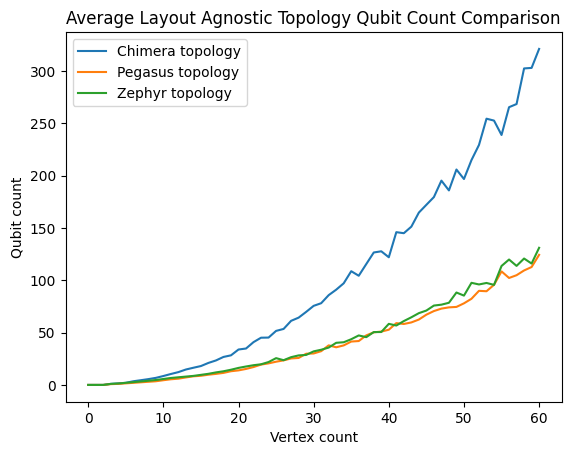

In [83]:
# Average Qubits, Compare Topology per Algorithm
# MM [Agnostic]
plt.plot(ns, avg_chim_comp_agn_sum)
plt.plot(ns, avg_peg_comp_agn_sum)
plt.plot(ns, avg_zeph_comp_agn_sum)
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit count")
plt.title("Average Layout Agnostic Topology Qubit Count Comparison")
plt.show()
# plt.savefig("images/avg_comp_agn_qubits.png")

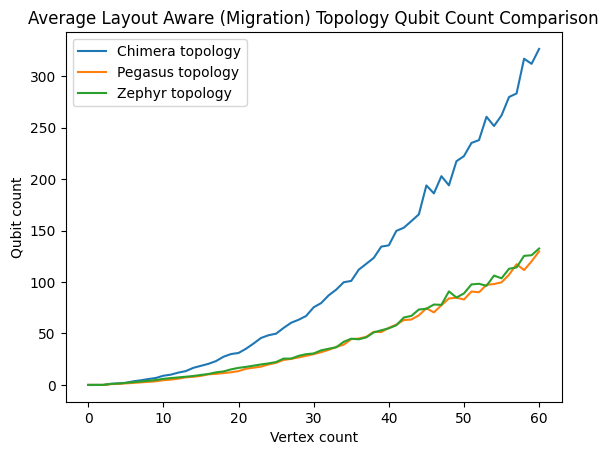

In [84]:
# Average Qubits, Compare Topology per Algorithm
# LA Mig=True
plt.clf()
plt.plot(ns, avg_chim_comp_lamg_sum)
plt.plot(ns, avg_peg_comp_lamg_sum)
plt.plot(ns, avg_zeph_comp_lamg_sum)
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit count")
plt.title("Average Layout Aware (Migration) Topology Qubit Count Comparison")
plt.show()
#plt.savefig("images/avg_comp_lamg_qubits.png")

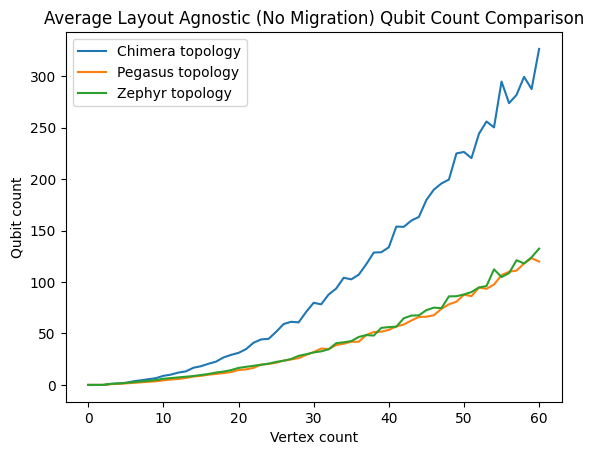

In [85]:
# Average Qubits, Compare Topology per Algorithm
# LA Mig=False
plt.clf()
plt.plot(ns, avg_chim_comp_lanomg_sum)
plt.plot(ns, avg_peg_comp_lanomg_sum)
plt.plot(ns, avg_zeph_comp_lanomg_sum)
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit count")
plt.title("Average Layout Agnostic (No Migration) Qubit Count Comparison")
plt.show()
#plt.savefig("images/avg_comp_lanomg_qubits.png")

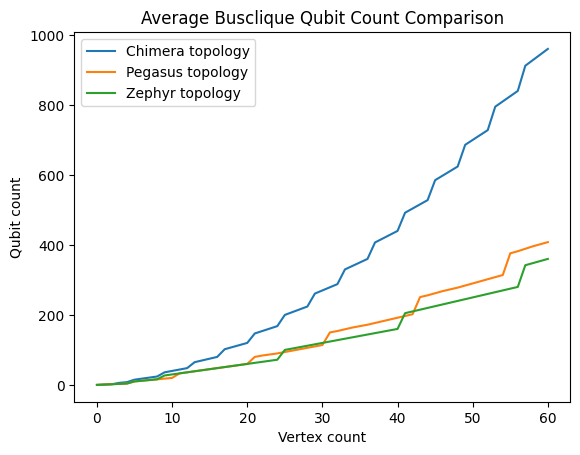

In [18]:
# Average Qubits, Compare Topology per Algorithm
# Busclique
plt.clf()
plt.plot(ns, avg_chim_comp_bc_sum)
plt.plot(ns, avg_peg_comp_bc_sum)
plt.plot(ns, avg_zeph_comp_bc_sum)
plt.legend(["Chimera topology", "Pegasus topology","Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit count")
plt.title("Average Busclique Qubit Count Comparison")
plt.show()
#plt.savefig("images/avg_comp_bc_qubits.png")

In [40]:
#### avg times #### 4 runs, avgd.

In [5]:
#60avg_complete_data02_z15.txt
avg_zeph_comp_agn_time = [0.0, 0.0, 0.0, 0.035710070312499974, 0.023654140624999917, 0.026769500000000036, 0.030320531250000116, 0.031434753906249856, 0.0413052031250002, 0.0489027617187498, 0.05972255468750064, 0.06331211328124942, 0.061222730468750444, 0.07654278906250085, 0.10187516796875123, 0.12325596875000008, 0.17893371484375034, 0.20304353906250133, 0.2214543906249988, 0.3281040000000019, 0.25548946093749975, 0.35297546874999935, 0.3632401093749994, 0.3832221367187473, 0.47461571093749866, 0.5946438710937506, 0.7135106757812495, 0.7982914999999966, 1.2604836367187513, 1.3011121054687533, 1.333408003906252, 1.795014140624996, 1.5156093437500022, 2.1467422929687645, 1.5399196562500284, 1.6163877578125048, 1.3882074062500043, 2.66911600781251, 2.117854031249986, 4.308164089843745, 2.5592222734374577, 4.438315480468742, 3.745946910156225, 3.720597582031247, 3.2048694218749842, 5.1347993203124975, 4.183302542968802, 7.84617496093751, 7.717728023437456, 5.6283980312499935, 8.27668446093742, 8.663954820312544, 6.635368644531226, 10.716944625000089, 10.477701492187567, 5.882634148437468, 5.364775773437586, 9.818140718749902, 14.024395046875117, 21.24240224609385, 15.08977838281238]
avg_zeph_comp_lamg_time = [0.0, 0.0, 0.0, 0.07117835156250005, 0.04996626562499998, 0.05216960937499997, 0.06047928515625001, 0.06355653906250001, 0.06791021093749997, 0.08130967187500059, 0.09520303906250033, 0.10202710156250007, 0.11838410156250004, 0.15532461718750012, 0.17786765234375032, 0.21752633203125027, 0.24929882421874894, 0.2451668828125008, 0.37730039062499865, 0.4262014335937517, 0.37716107031250146, 0.46991109374999734, 0.5783070234375005, 0.6940432031249961, 0.7435045546874987, 0.9659991210937477, 0.9499891210937502, 0.9883284492187528, 1.1652859414062462, 1.2366879570312468, 1.1848100273437432, 1.383814871093752, 1.9313764921875, 1.4592729648437603, 2.1060791054687478, 2.101413476562484, 3.2848604218750106, 3.918434882812506, 3.748098675781222, 3.9685203867187404, 4.049522792968752, 3.9636908554687276, 3.776998519531227, 3.5009127265624844, 4.712104710937474, 7.2980365703124885, 5.508076816406296, 10.79956690625003, 5.459744171874993, 6.402842890625054, 6.910349664062471, 6.861472398437572, 7.932736414062598, 10.740303515625008, 6.321616378906224, 10.682122394531259, 16.084186007812548, 12.074702187499959, 10.00425897656255, 15.717523832031315, 11.367738628906281]
avg_zeph_comp_lanomg_time = [0.0, 0.0, 0.0, 0.04613504296874996, 0.04621526171875003, 0.04630658984374986, 0.0492940312499999, 0.06254932812499985, 0.10115076171874987, 0.07570941406249956, 0.10177714843750046, 0.10793152343749995, 0.1050787226562508, 0.12483628125000096, 0.15597093359374978, 0.16641242578125104, 0.2313209140625003, 0.2772371015625004, 0.40430231640624714, 0.4326069960937509, 0.36043706249999874, 0.45036089062499907, 0.4771973242187469, 0.6765392382812506, 0.631228929687502, 0.6818691875000019, 1.3843852773437453, 0.9641020351562517, 0.9923848476562513, 1.1486929804687471, 1.912691085937497, 2.5668682382812458, 2.3466937304687665, 1.7523694335937479, 2.689174386718746, 2.965956695312508, 2.408215234374981, 2.894254023437493, 5.170639664062464, 2.9945821796874883, 4.271344011718759, 2.829118328124972, 5.053706124999997, 5.280754101562475, 5.716544058593746, 8.240232789062436, 6.698771441406237, 11.13654585546883, 5.126096671875073, 7.304227238281273, 10.168093132812585, 10.168243152343793, 11.422669128906167, 10.521466234374937, 7.50507613281248, 18.97592090625016, 16.600763886718624, 9.185430898437634, 12.711104964843802, 13.806958398437356, 20.995227234374852]

In [6]:
#60avg_data0d1_p16.txt
avg_peg_comp_agn_time= [0.0, 0.0, 0.0, 0.007272108160000039, 0.007442309119999921, 0.0133203465599997, 0.012580342719999884, 0.018904179199999628, 0.016757011199999804, 0.01794167775999981, 0.023878501119999763, 0.029311410240001078, 0.04061555552000202, 0.05195957632000238, 0.06305976320000119, 0.09210497408000203, 0.11057643647999889, 0.11857273407999938, 0.1178778019200007, 0.1421189145600033, 0.17505539551999652, 0.2735388006399981, 0.29525076832000097, 0.31841955007999095, 0.24820609983999767, 0.40428566624000106, 0.4585333977600087, 0.5135952380800071, 0.7438589449599909, 0.5102353488000027, 1.0818418947200008, 1.3629461856000025, 0.7052225823999955, 0.740758190079992, 1.1564088771200014, 1.8087835219199744, 1.8639680953599846, 2.5727241020799783, 2.3682366912000195, 1.428339112319962, 5.176849233919993, 2.6853930422400163, 2.7546637302399333, 2.9530024934400134, 7.172203861760039, 1.583301376319935, 3.2102429894400366, 3.4166195260799994, 2.4709830537598916, 3.1460322064001454, 3.7970967737600807, 3.034340083840079, 9.327427823999992, 6.735231177920099, 4.549268975999998, 8.70878533663996, 7.589311223680006, 4.815054612480212, 3.7574670489601543, 10.974169012800024, 6.495463610239869]
avg_peg_comp_lamg_time= [0.0, 0.0, 0.0, 0.019720017919999985, 0.020944428800000102, 0.02665362528000028, 0.026305782399999568, 0.03469007647999932, 0.03256186368000109, 0.036207737280000436, 0.05301295071999993, 0.06423451743999964, 0.07810838783999935, 0.08385987968000039, 0.09525365184000179, 0.14006877375999935, 0.15551780832000078, 0.13831133984000207, 0.20565856319999698, 0.2188516979199968, 0.33466360863999534, 0.47443247327999893, 0.8240877353600016, 0.485834181440005, 0.6721026070399999, 0.5524929116800028, 0.7125825286400043, 0.8162122208000092, 0.983656709760003, 0.9819874630399861, 1.4564650163200086, 2.3796145225599963, 2.0572418086399917, 2.641967478399989, 3.092840741439983, 2.329387155840028, 2.6656730575999976, 3.3405032617600368, 4.078838767999985, 3.995031853120016, 3.066971085439955, 4.346198153920039, 3.4999061043200173, 7.479976576640013, 5.302891907519976, 5.840261471999915, 3.9875258326399985, 5.785172968639945, 3.60537886176001, 4.563255022720082, 8.53501456416013, 6.340715703679957, 6.203136836160014, 6.826208884799857, 8.632604368319965, 13.933863975039921, 11.955845626880066, 7.0532572953600665, 13.374459746240001, 8.819987163520093, 9.819602033280088]
avg_peg_comp_lanomg_time= [0.0, 0.0, 0.0, 0.01520392832000001, 0.016342264959999964, 0.020077894399999914, 0.02414520384000047, 0.034089110080000276, 0.02890651327999974, 0.033510019839999905, 0.04308104063999998, 0.0577002035200009, 0.052244695040000934, 0.09048828192000087, 0.09719284256000198, 0.11883090975999866, 0.12325400736000076, 0.16407802848000014, 0.16343310624000246, 0.22809778144000084, 0.3869422688000043, 0.3900419382399995, 0.6574472006400003, 0.5302810598399972, 0.5841378272000004, 0.5093753772799964, 0.9999820147199946, 1.3552840783999938, 0.8134512681600043, 1.1494247401600062, 1.335458745600003, 0.9926887804799858, 2.4321224515199975, 1.8522198137600103, 2.8058979171200074, 2.3123325529599916, 2.2794768614400045, 3.5583779545600116, 3.0432347830399893, 2.5057333260799846, 3.6207256470400098, 2.587927983359998, 5.557358907840046, 3.965857267199977, 3.8007226351999828, 4.613518575680024, 5.55466341375991, 6.419163067840019, 6.895957128959871, 7.872001111360044, 5.449910236480102, 9.010430113919895, 10.093892032640051, 8.826475069119974, 9.449520447359944, 8.638894394879987, 6.234825108479901, 11.504027462399899, 9.796687408639738, 8.607963812480095, 19.173656119679897]

In [7]:
#60avg_data03_dw2000.txt
avg_chim_comp_agn_time= [0.0, 0.0, 0.0, 0.0014591439999999303, 0.0017746928000000437, 0.0020423721600000312, 0.003912780800000114, 0.006534762560000118, 0.010877199360000084, 0.01480934783999999, 0.03366292767999975, 0.0388055859200002, 0.05095564031999992, 0.08268765951999998, 0.060270373439999504, 0.22046247487999993, 0.21556549471999958, 0.3222983094399983, 0.45728649216000106, 0.35366475487999954, 0.2807934582400001, 0.7663695708800004, 0.514671725760001, 0.4694702416000032, 0.4796294006399918, 0.8031892150400008, 0.5827090083200037, 1.1274071225600022, 1.1021626223999885, 0.7927581532800081, 1.0588137040000007, 1.7570927910399887, 0.8241131065600099, 1.117058260799986, 1.6045984912000002, 2.491520799679999, 3.2035659548799797, 1.368074309760025, 1.6423704540800128, 2.2806436899199958, 3.9888689564799984, 2.1428093753599438, 2.387627641600051, 4.365367367359981, 3.2529266195200477, 5.501542717439969, 5.153553126080067, 2.757861102720001, 5.814143687359971, 5.200733147839953, 4.849096738880076, 2.746235031679997, 3.383301072000024, 2.3726470806400086, 3.0364084038399257, 5.1991007871999155, 6.025373488000015, 2.8280175232000855, 2.671469117440033, 7.56709262111991, 3.610231393600059]
avg_chim_comp_lamg_time= [0.0, 0.0, 0.0, 0.006288509439999962, 0.0063654281599999874, 0.0057862044799999925, 0.009166483520000015, 0.012553425920000241, 0.012852649279999651, 0.017474951679999996, 0.04982081760000024, 0.038913043199999775, 0.05595321535999992, 0.06538954783999966, 0.12247937664000001, 0.15964778847999925, 0.22040823712000032, 0.3505117868800002, 0.20728066752000088, 0.37534347455999806, 0.3670769795200012, 0.5212881536000001, 0.4690101190400008, 0.5607319433599959, 1.2665232751999977, 0.9118626777599921, 0.5305890140800051, 1.2955353932799967, 1.7236798166400036, 1.4304875775999826, 1.6647563871999895, 1.439751028800002, 1.7894550787200085, 3.4156492287999916, 1.5218863699200047, 1.495843599039961, 1.7963232713599986, 1.2252351520000309, 5.290145391359994, 3.041037664959987, 1.5237873286399952, 2.910805632000023, 3.394759301439964, 3.7564144361599503, 3.1523317811199907, 2.2254807871999582, 3.7083937136000236, 2.1636398579200353, 4.755204297280022, 2.0303298435199366, 5.22325727103996, 3.4985016934399225, 4.499485777599967, 3.294326768640007, 6.2986616470400465, 9.154444551039976, 4.516791443839976, 6.74713670143997, 3.2612886867199933, 4.949231112639844, 5.269287317759995]
avg_chim_comp_lanomg_time= [0.0, 0.0, 0.0, 0.003218149759999997, 0.004943559359999848, 0.004321088319999912, 0.008216615360000021, 0.007834099839999848, 0.011021888639999778, 0.01748541343999993, 0.04104104992000024, 0.046353487680000215, 0.04106296000000033, 0.11821315839999962, 0.1239941129600001, 0.0854448576000003, 0.19260375968, 0.2637485375999987, 0.2672068111999984, 0.6310329145600018, 0.5194065257600052, 0.5609784275200008, 0.354246929600003, 0.47602990656000144, 0.6347690803199995, 0.7974000710399952, 1.2189046502399996, 1.0530850582399922, 1.1643478720000005, 0.9164144118400017, 0.6391532611199866, 1.2418442083199999, 1.1296792463999996, 1.4369432390400154, 1.870896420480006, 2.282323629759987, 2.350212484480016, 2.333396864640019, 2.6479891308799863, 2.877174208639995, 3.5295892732800005, 2.175944371519912, 3.176061005439999, 2.755672149440034, 6.236172787839968, 3.2012005372799957, 3.438301613759971, 3.328402847040055, 3.3368743145599766, 2.809928146880031, 3.2735882432000265, 6.664125124480103, 3.995386399679989, 3.904895141760077, 5.454813542080011, 3.1931501910400377, 6.84908194975988, 6.780045696959894, 5.891034434879974, 9.347649928640031, 5.0811168496000825]

In [8]:
#mm_comp_out_run0.txt & #mm_comp_out_zrun1.txt
avg_chim_comp_bc_time= [0.0101899999999997, 0.0048200000000004906, 0.004464999999999719, 0.004081000000000223, 0.004087000000000174, 0.004483000000000459, 0.0041930000000007794, 0.00604700000000058, 0.003978999999999289, 0.0043730000000010705, 0.005917000000000172, 0.0040279999999999205, 0.0040919999999999845, 0.004739000000000715, 0.0036279999999990764, 0.0038580000000010273, 0.0036650000000051364, 0.0037640000000038754, 0.003842999999996266, 0.004877000000000464, 0.0049949999999938655, 0.004734999999996603, 0.004681000000005042, 0.004896999999999707, 0.004084000000005972, 0.004918000000003531, 0.004306999999982963, 0.004944999999963784, 0.003967999999986205, 0.005021999999996751, 0.005738999999948646, 0.0049579999999878055, 0.0036539999999831707, 0.003880999999978485, 0.00492399999995996, 0.0039249999999810825, 0.005202999999937674, 0.005157999999937601, 0.00490300000001298, 0.007039999999960855, 0.005075000000033469, 0.004004000000122687, 0.003913999999895168, 0.004932000000053449, 0.005601000000069689, 0.004405000000133441, 0.004248999999845182, 0.005121000000144704, 0.004120999999940977, 0.003953999999794178, 0.004779999999755091, 0.00509299999976065, 0.005094999999982974, 0.004010999999991327, 0.004912999999760359, 0.006966999999804102, 0.0049019999996744446, 0.004230000000006839, 0.004386999999951513, 0.008947999999691092, 0.006172000000333355]
avg_peg_comp_bc_time= [0.05665899999999979, 0.06624799999999986, 0.05304500000000001, 0.049751999999999796, 0.05164200000000019, 0.053440000000000154, 0.0531050000000004, 0.06413700000000055, 0.049910000000000565, 0.05602400000000074, 0.06414999999999971, 0.05356399999999972, 0.055041000000001006, 0.06374699999999933, 0.05176799999999915, 0.04556500000000341, 0.044039000000005046, 0.04867399999999833, 0.04527300000000167, 0.04584200000000038, 0.04818199999999706, 0.04867900000000702, 0.048799999999999955, 0.05073400000000561, 0.04906800000000544, 0.04808700000000954, 0.075097999999997, 0.04639600000001565, 0.048475999999993746, 0.04745899999994663, 0.04705099999995355, 0.04358799999999974, 0.0495019999999613, 0.04938700000002427, 0.048499999999989996, 0.046963000000005195, 0.05188799999996263, 0.047526999999945474, 0.046234000000026754, 0.060901999999941836, 0.05090199999995093, 0.05198500000005879, 0.05436299999996663, 0.04900899999984176, 0.05622500000004038, 0.05595299999981762, 0.05329599999981838, 0.048924000000170054, 0.048545999999987544, 0.04863999999997759, 0.05305300000009083, 0.049447999999756576, 0.05317299999978786, 0.0480889999998908, 0.04918700000007448, 0.05879000000004453, 0.04766699999981938, 0.05037099999981365, 0.05119100000047183, 0.06743300000016461, 0.057229000000006636]
avg_zeph_comp_bc_time= [0.09652424999990217, 0.09313650000012785, 0.09575825000001714, 0.0893069999999625, 0.09172574999990957, 0.09335049999992862, 0.09150599999998121, 0.09195150000005015, 0.0884337500001493, 0.09220399999992424, 0.09250049999991461, 0.09049975000016275, 0.09249174999990828, 0.09191075000001092, 0.09026249999999436, 0.09215175000008458, 0.0905257500000971, 0.09413474999996652, 0.09109475000002476, 0.0910012500000903, 0.08922249999989162, 0.09116849999998067, 0.09283750000008695, 0.09240150000016456, 0.10295574999997825, 0.09526824999989003, 0.0910075000000461, 0.09126099999991766, 0.09196899999994912, 0.08971675000009327, 0.09513174999995044, 0.09630349999997634, 0.09753275000002759, 0.09686424999995324, 0.09311575000003813, 0.09294450000004417, 0.09317299999997886, 0.09210050000001502, 0.09432475000005525, 0.09138249999989512, 0.09379100000012386, 0.09566849999998794, 0.09517974999994294, 0.09178850000000693, 0.09548649999987902, 0.09427000000005137, 0.09673899999984314, 0.09475650000013047, 0.09525274999998601, 0.09495525000011185, 0.09685924999985218, 0.1029052500001626, 0.09543325000004188, 0.10523750000004384, 0.09935824999979559, 0.09059549999983574, 0.10177000000021508, 0.09656425000002855, 0.09306650000007721, 0.09408500000017739, 0.08949250000000575]

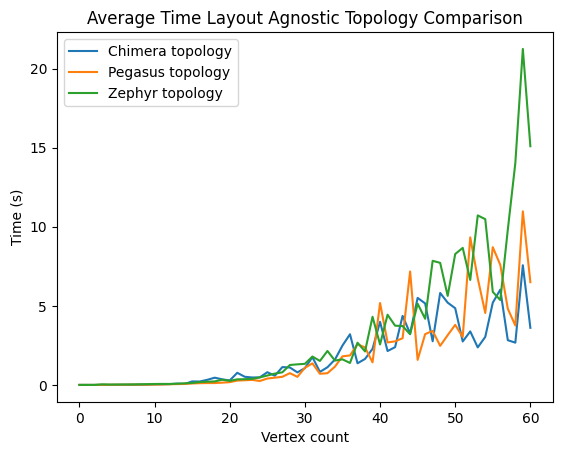

In [90]:
# Average Time, Compare Topology per Algorithm
# MM [Agnostic]
plt.plot(ns, avg_chim_comp_agn_time)
plt.plot(ns, avg_peg_comp_agn_time)
plt.plot(ns, avg_zeph_comp_agn_time)
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Average Time Layout Agnostic Topology Comparison")
plt.show()
#plt.savefig("images/avg_comp_agn_time.png")

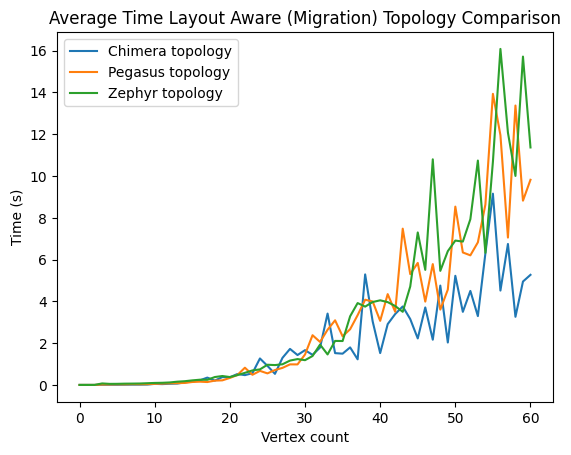

In [91]:
# Average Time, Compare Topology per Algorithm
# LA Mig=True
plt.clf()
plt.plot(ns, avg_chim_comp_lamg_time)
plt.plot(ns, avg_peg_comp_lamg_time)
plt.plot(ns, avg_zeph_comp_lamg_time)
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Average Time Layout Aware (Migration) Topology Comparison")
plt.show()
#plt.savefig("images/avg_comp_lamg_time.png")

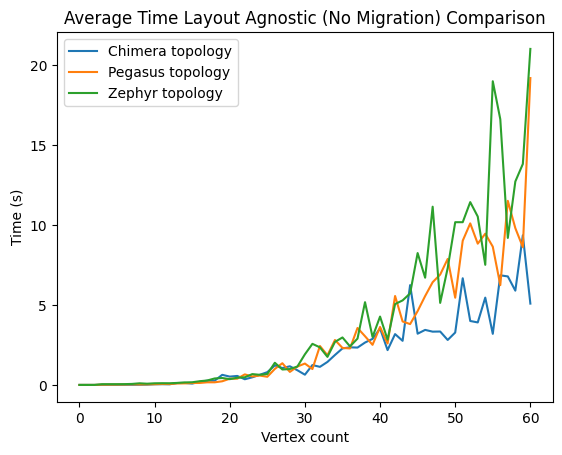

In [92]:
# Average Time, Compare Topology per Algorithm
# LA Mig=False
plt.clf()
plt.plot(ns, avg_chim_comp_lanomg_time)
plt.plot(ns, avg_peg_comp_lanomg_time)
plt.plot(ns, avg_zeph_comp_lanomg_time)
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Average Time Layout Agnostic (No Migration) Comparison")
plt.show()
#plt.savefig("images/avg_comp_lanomg_time.png")

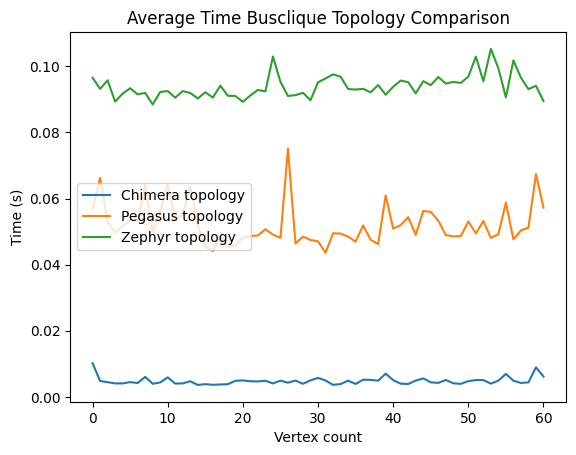

In [5]:
# Average Time, Compare Topology per Algorithm
# Busclique
plt.plot(ns, avg_chim_comp_bc_time)
plt.plot(ns, avg_peg_comp_bc_time)
plt.plot(ns, avg_zeph_comp_bc_time)
plt.legend(["Chimera topology", "Pegasus topology","Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Average Time Busclique Topology Comparison")
plt.show()
#plt.savefig("images/avg_comp_bc_time.png")

In [18]:
#### avg maxchain #### 4 runs, avgd.

In [26]:
#60avg_complete_data02_z15.txt
avg_zeph_comp_agn_maxchain= [0.0, 0.0, 0.0, 0.33203125, 0.33203125, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 1.01171875, 1.24609375, 0.99609375, 1.328125, 1.32421875, 1.328125, 1.33203125, 1.390625, 1.40625, 1.640625, 1.66015625, 1.66015625, 1.91015625, 1.67578125, 1.6640625, 1.7421875, 1.9921875, 2.0078125, 1.9921875, 2.05859375, 2.0546875, 2.01171875, 2.26171875, 2.07421875, 2.26171875, 2.58984375, 2.375, 2.59375, 2.63671875, 2.58984375, 2.40625, 3.171875, 3.234375, 3.05078125, 2.96875, 2.75390625, 3.0546875]
avg_zeph_comp_lamg_maxchain= [0.0, 0.0, 0.0, 0.33203125, 0.33203125, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.7265625, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 1.05859375, 1.0625, 1.26171875, 1.32421875, 1.328125, 1.390625, 1.33203125, 1.578125, 1.390625, 1.39453125, 1.66015625, 1.91015625, 1.66015625, 1.66015625, 1.9921875, 1.73828125, 1.9921875, 2.0078125, 2.3203125, 2.2578125, 2.3203125, 2.32421875, 2.32421875, 2.32421875, 2.83984375, 2.58984375, 2.65625, 2.59375, 2.90234375, 2.65625, 2.77734375, 2.734375, 2.92578125, 3.0, 3.05078125, 3.23828125, 3.3671875]
avg_zeph_comp_lanomg_maxchain=[0.0, 0.0, 0.0, 0.33203125, 0.33203125, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.6640625, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 0.99609375, 1.0, 1.0, 1.328125, 1.328125, 1.390625, 1.328125, 1.34765625, 1.66015625, 1.66015625, 1.66015625, 1.9765625, 1.72265625, 1.66796875, 1.9765625, 1.73828125, 2.0703125, 2.05859375, 2.24609375, 2.0546875, 2.26171875, 2.32421875, 2.05859375, 2.59375, 2.57421875, 2.40625, 2.328125, 2.70703125, 2.65625, 3.015625, 2.66015625, 2.92578125, 3.2265625, 2.80078125, 2.99609375, 3.2578125]

In [94]:
#60avg_data0d1_p16.txt
avg_peg_comp_agn_maxchain= [0.0, 0.0, 0.0, 0.24992, 0.24992, 0.49984, 0.49984, 0.49984, 0.49984, 0.49984, 0.49984, 0.50976, 0.74176, 0.74816, 0.74976, 0.74976, 0.74976, 0.74976, 0.74976, 0.94976, 0.7996800000000001, 0.99968, 0.99968, 1.03968, 1.208, 1.2012800000000001, 1.24992, 1.2496, 1.0496, 1.4496, 1.2975999999999999, 1.2992000000000001, 1.6591999999999998, 1.49952, 1.5491199999999998, 1.54112, 1.54752, 1.7878399999999999, 1.95744, 1.7955200000000002, 1.75712, 1.98944, 1.9990400000000002, 1.79936, 1.8054400000000002, 2.27296, 2.19904, 1.99936, 2.19904, 2.08928, 2.06496, 2.2409600000000003, 2.48928, 2.25088, 2.4656, 2.69888, 2.5068799999999998, 2.55552, 2.6928, 2.7395199999999997, 2.90048]
avg_peg_comp_lamg_maxchain= [0.0, 0.0, 0.0, 0.24992, 0.24992, 0.49984, 0.49984, 0.49984, 0.49984, 0.50144, 0.70784, 0.74976, 0.74976, 0.74944, 0.74976, 0.74976, 0.74976, 0.74976, 0.74976, 0.75776, 0.75136, 0.99968, 0.99968, 1.04, 1.00128, 1.048, 1.2096, 1.2496, 1.24992, 1.2512, 1.2592, 1.45152, 1.49952, 1.54112, 1.54784, 1.7014399999999998, 1.70944, 1.7494399999999999, 1.7494399999999999, 1.7894400000000001, 1.79104, 1.95776, 2.00736, 1.9593599999999998, 2.00896, 2.40896, 2.20288, 2.28928, 2.44896, 2.48992, 2.26752, 2.33728, 2.2912, 2.4928, 2.50752, 2.55552, 2.5078400000000003, 2.9798400000000003, 2.75232, 3.0371200000000003, 3.0019199999999997]
avg_peg_comp_lanomg_maxchain= [0.0, 0.0, 0.0, 0.24992, 0.24992, 0.49984, 0.49984, 0.49984, 0.49984, 0.50144, 0.5078400000000001, 0.74816, 0.74016, 0.74976, 0.74976, 0.74976, 0.74976, 0.74976, 0.74976, 0.74976, 0.9577600000000001, 0.95168, 0.99968, 1.19968, 1.03968, 1.2096, 1.2416, 1.2496, 1.2576, 1.44992, 1.4512, 1.6595199999999999, 1.45952, 1.6995200000000001, 1.50784, 1.50784, 1.70944, 1.74784, 1.95264, 1.95744, 1.7574400000000001, 1.7977599999999998, 1.8393599999999999, 2.00576, 2.20736, 2.00928, 2.04128, 2.2492799999999997, 2.2496, 2.29088, 2.49184, 2.2652799999999997, 2.7011200000000004, 2.2928, 2.5152, 2.98304, 2.7567999999999997, 2.7952, 2.94752, 2.80672, 2.64224]

In [95]:
#60avg_data03_dw2000.txt
avg_chim_comp_agn_maxchain= [0.0, 0.0, 0.0, 0.49984, 0.49984, 0.49984, 0.74976, 0.74976, 0.79136, 0.99968, 0.99968, 1.2092800000000001, 1.248, 1.4512, 1.49952, 1.49952, 1.49952, 1.5491199999999998, 1.7494399999999999, 1.70944, 2.03936, 2.008, 2.2399999999999998, 2.45088, 2.2492799999999997, 2.5459199999999997, 2.58784, 2.74752, 3.0463999999999998, 3.02944, 3.47936, 3.09056, 3.688, 3.5049599999999996, 3.7887999999999997, 3.9171199999999997, 3.4995199999999995, 3.99008, 4.31168, 4.07872, 3.83264, 4.9702399999999995, 4.37248, 4.50528, 5.02496, 4.9936, 4.95936, 5.7792, 4.95328, 5.93312, 4.84896, 5.39328, 5.73696, 7.20288, 6.41824, 5.8064, 6.970879999999999, 6.4688, 6.9488, 7.45728, 8.09216]
avg_chim_comp_lamg_maxchain= [0.0, 0.0, 0.0, 0.49984, 0.49984, 0.49984, 0.74976, 0.74976, 0.95136, 0.99968, 0.99968, 0.99968, 1.24192, 1.2496, 1.45952, 1.49952, 1.49952, 1.70944, 1.95744, 1.9494399999999998, 1.7510400000000002, 2.00096, 2.2896, 2.4896000000000003, 2.44448, 2.30656, 2.90112, 2.78112, 2.7875199999999998, 3.07392, 3.13088, 3.04992, 3.50816, 3.59232, 3.76832, 3.6428799999999995, 3.91072, 4.8486400000000005, 3.9065600000000003, 4.57888, 4.7408, 4.96128, 4.99392, 4.6688, 4.92928, 5.8656, 5.56736, 6.34784, 5.578239999999999, 6.73216, 6.2543999999999995, 6.45408, 6.37088, 6.647679999999999, 6.55552, 6.7104, 7.3619200000000005, 6.65472, 7.91392, 7.5120000000000005, 7.7536000000000005]
avg_chim_comp_lanomg_maxchain= [0.0, 0.0, 0.0, 0.49984, 0.49984, 0.49984, 0.74976, 0.74976, 0.78976, 0.99968, 1.03968, 0.99968, 1.2496, 1.28992, 1.49952, 1.45952, 1.50912, 1.5414400000000001, 1.7494399999999999, 1.74304, 1.75776, 1.99776, 2.29536, 2.44896, 2.0591999999999997, 2.5312, 2.95712, 2.8070399999999998, 2.59712, 3.15008, 3.61696, 3.05856, 3.62816, 3.6985599999999996, 3.8192, 3.8684799999999995, 3.968, 4.4790399999999995, 4.41696, 4.05056, 4.4809600000000005, 4.79328, 5.18272, 4.97952, 4.776, 5.9302399999999995, 5.1664, 6.02016, 6.0, 6.83808, 7.00832, 6.00288, 6.54592, 6.525440000000001, 6.240959999999999, 7.11584, 6.20256, 6.74816, 6.959999999999999, 6.508799999999999, 7.83648]

In [24]:
#mm_comp_out_run0.txt & #mm_comp_out_zrun1.txt
avg_chim_comp_bc_maxchain= [ 0,  1,  1,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,
  7,  8,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12 ,12 ,12, 13, 13, 13,
 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16]
avg_peg_comp_bc_maxchain= [0, 1 ,1 ,1 ,1, 2, 2, 2, 2, 2 ,2, 3, 3, 3 ,3 ,3 ,3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7]
avg_zeph_comp_bc_maxchain= [0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0]

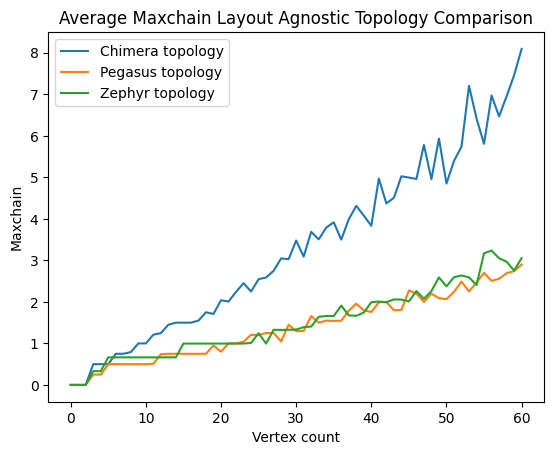

In [96]:
# Average Maxchain Size, Compare Topology per Algorithm
# MM [Agnostic]
plt.plot(ns, avg_chim_comp_agn_maxchain)
plt.plot(ns, avg_peg_comp_agn_maxchain)
plt.plot(ns, avg_zeph_comp_agn_maxchain)
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain")
plt.title("Average Maxchain Layout Agnostic Topology Comparison")
plt.show()
#plt.savefig("images/avg_comp_agn_maxchain.png")

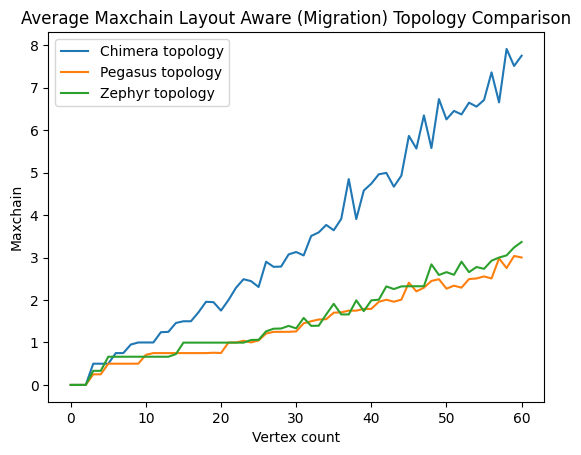

In [97]:
# Average Maxchain Size, Compare Topology per Algorithm
# LA Mig=True
plt.clf()
plt.plot(ns, avg_chim_comp_lamg_maxchain)
plt.plot(ns, avg_peg_comp_lamg_maxchain)
plt.plot(ns, avg_zeph_comp_lamg_maxchain)
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain")
plt.title("Average Maxchain Layout Aware (Migration) Topology Comparison")
plt.show()
#plt.savefig("images/avg_comp_lamg_maxchain.png")

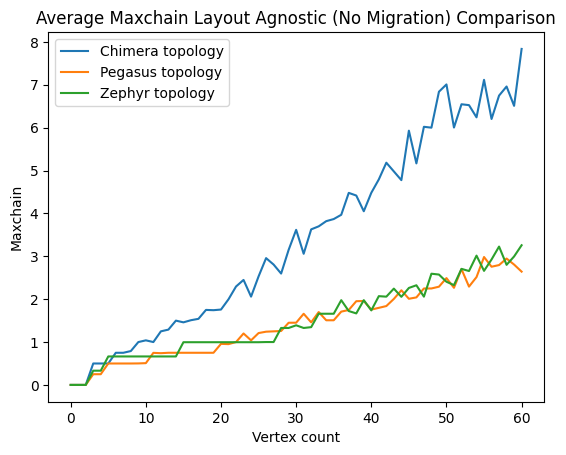

In [98]:
# Average Maxchain Size, Compare Topology per Algorithm
# LA Mig=False
plt.clf()
plt.plot(ns, avg_chim_comp_lanomg_maxchain)
plt.plot(ns, avg_peg_comp_lanomg_maxchain)
plt.plot(ns, avg_zeph_comp_lanomg_maxchain)
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain")
plt.title("Average Maxchain Layout Agnostic (No Migration) Comparison")
plt.show()
#plt.savefig("images/avg_comp_lanomg_maxchain.png")

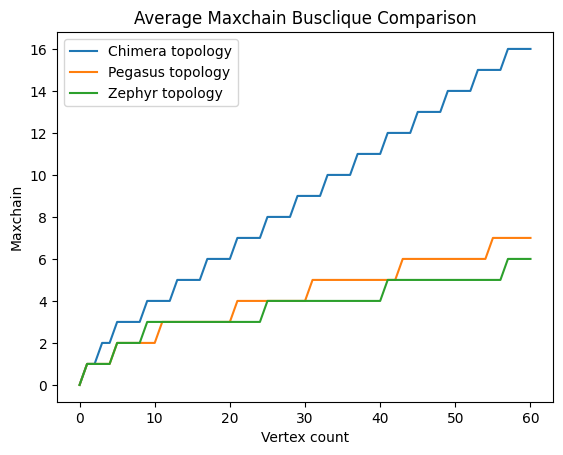

In [19]:
# Average Maxchain Size, Compare Topology per Algorithm
# Busclique
plt.clf()
plt.plot(ns, avg_chim_comp_bc_maxchain)
plt.plot(ns, avg_peg_comp_bc_maxchain)
plt.plot(ns, avg_zeph_comp_bc_maxchain)
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain")
plt.title("Average Maxchain Busclique Comparison")
plt.show()
#plt.savefig("images/avg_comp_bc_maxchain.png")

In [ ]:
#### MM vs. BC vs. LA ####

In [ ]:
#### TIME ####

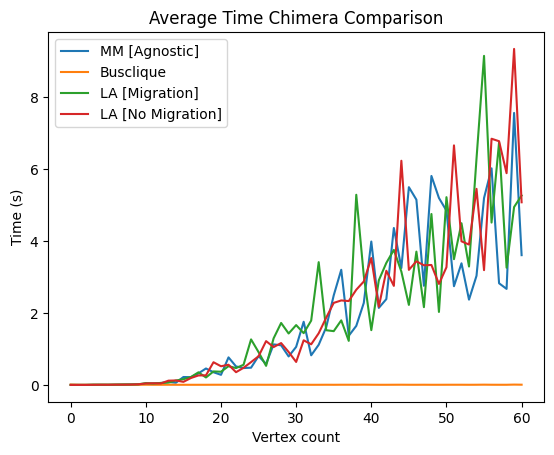

In [9]:
plt.clf()
plt.plot(ns, avg_chim_comp_agn_time)
plt.plot(ns, avg_chim_comp_bc_time)
plt.plot(ns, avg_chim_comp_lamg_time)
plt.plot(ns, avg_chim_comp_lanomg_time)
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Average Time Chimera Comparison")
plt.show()
#plt.savefig("images/avg_comp_chimAll_time.png")

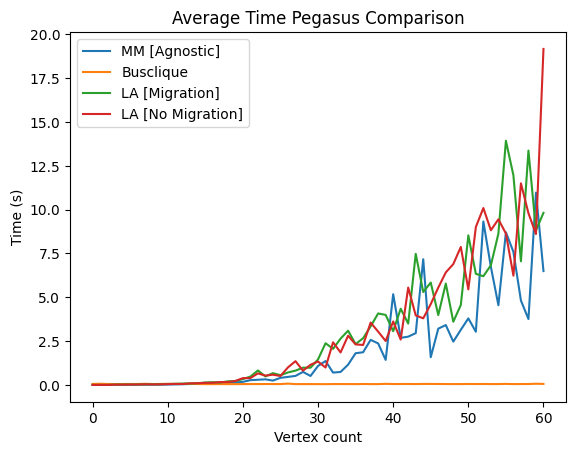

In [10]:
plt.clf()
plt.plot(ns, avg_peg_comp_agn_time)
plt.plot(ns, avg_peg_comp_bc_time)
plt.plot(ns, avg_peg_comp_lamg_time)
plt.plot(ns, avg_peg_comp_lanomg_time)
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Average Time Pegasus Comparison")
plt.show()
#plt.savefig("images/avg_comp_pegaAll_time.png")

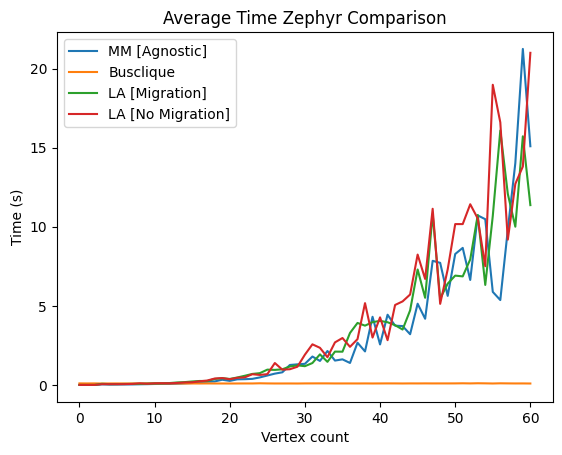

In [16]:
plt.clf()
plt.plot(ns, avg_zeph_comp_agn_time)
plt.plot(ns, avg_zeph_comp_bc_time)
plt.plot(ns, avg_zeph_comp_lamg_time)
plt.plot(ns, avg_zeph_comp_lanomg_time)
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Average Time Zephyr Comparison")
plt.show()
#plt.savefig("images/avg_comp_zephAll_time.png")

In [ ]:
#### QUBIT COUNT ####

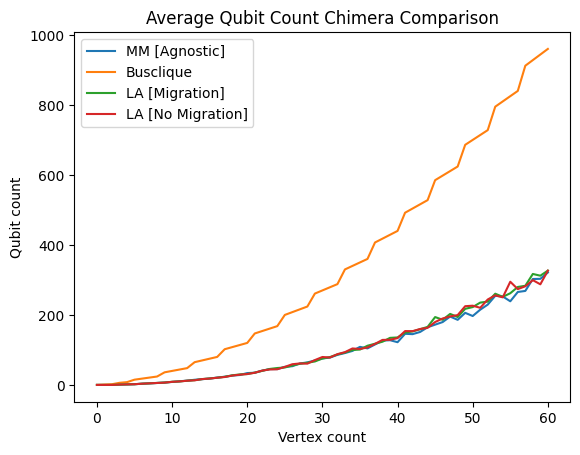

In [102]:
plt.clf()
plt.plot(ns, avg_chim_comp_agn_sum)
plt.plot(ns, avg_chim_comp_bc_sum)
plt.plot(ns, avg_chim_comp_lamg_sum)
plt.plot(ns, avg_chim_comp_lanomg_sum)
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit count")
plt.title("Average Qubit Count Chimera Comparison")
plt.show()
#plt.savefig("images/avg_comp_chimAll_qubitcnt.png")

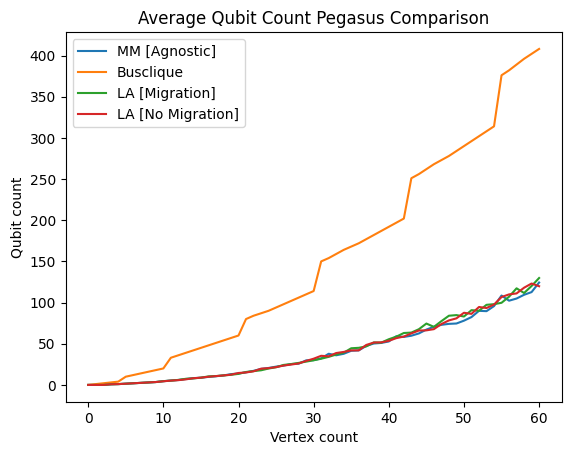

In [103]:
plt.clf()
plt.plot(ns, avg_peg_comp_agn_sum)
plt.plot(ns, avg_peg_comp_bc_sum)
plt.plot(ns, avg_peg_comp_lamg_sum)
plt.plot(ns, avg_peg_comp_lanomg_sum)
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit count")
plt.title("Average Qubit Count Pegasus Comparison")
plt.show()
#plt.savefig("images/avg_comp_pegaAll_qubitcnt.png")

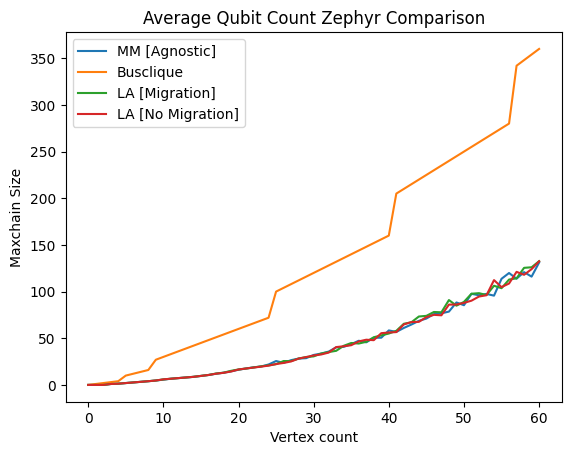

In [20]:
plt.clf()
plt.plot(ns, avg_zeph_comp_agn_sum)
plt.plot(ns, avg_zeph_comp_bc_sum)
plt.plot(ns, avg_zeph_comp_lamg_sum)
plt.plot(ns, avg_zeph_comp_lanomg_sum)
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Average Qubit Count Zephyr Comparison")
plt.show()
#plt.savefig("images/avg_comp_zephAll_qubitcnt.png")

In [ ]:
#### MAXCHAIN ####

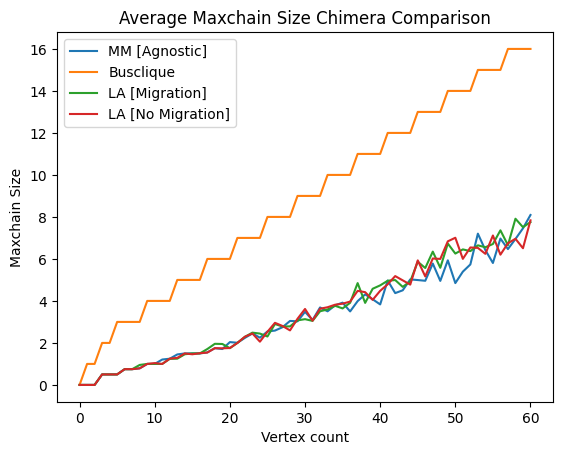

In [104]:
plt.clf()
plt.plot(ns, avg_chim_comp_agn_maxchain)
plt.plot(ns, avg_chim_comp_bc_maxchain)
plt.plot(ns, avg_chim_comp_lamg_maxchain)
plt.plot(ns, avg_chim_comp_lanomg_maxchain)
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Average Maxchain Size Chimera Comparison")
plt.show()
#plt.savefig("images/avg_comp_chimAll_maxchain.png")

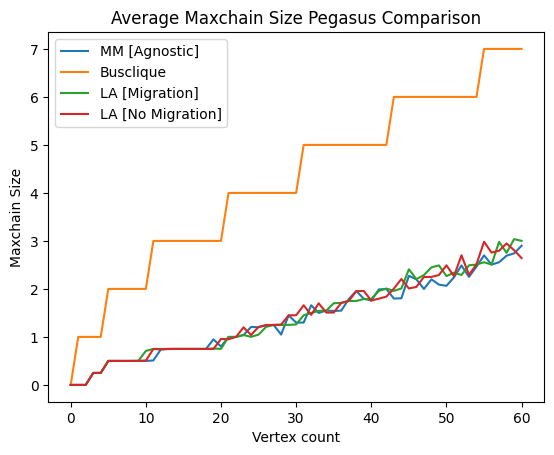

In [105]:
plt.clf()
plt.plot(ns, avg_peg_comp_agn_maxchain)
plt.plot(ns, avg_peg_comp_bc_maxchain)
plt.plot(ns, avg_peg_comp_lamg_maxchain)
plt.plot(ns, avg_peg_comp_lanomg_maxchain)
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Average Maxchain Size Pegasus Comparison")
plt.show()
#plt.savefig("images/avg_comp_pegaAll_maxchain.png")

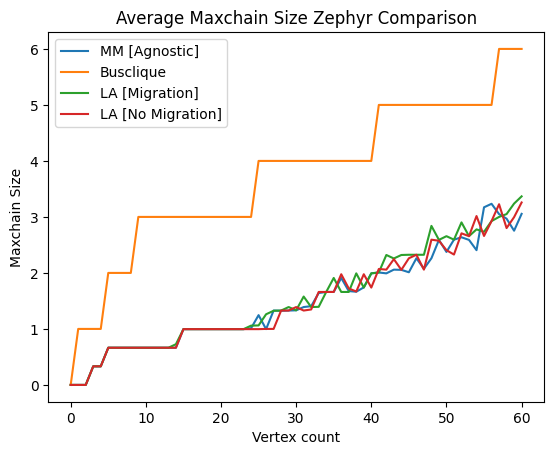

In [27]:
plt.clf()
plt.plot(ns, avg_zeph_comp_agn_maxchain)
plt.plot(ns, avg_zeph_comp_bc_maxchain)
plt.plot(ns, avg_zeph_comp_lamg_maxchain)
plt.plot(ns, avg_zeph_comp_lanomg_maxchain)
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Average Maxchain Size Zephyr Comparison")
plt.show()
#plt.savefig("images/avg_comp_zephAll_maxchain.png")

In [ ]:
#### W/O BC ####

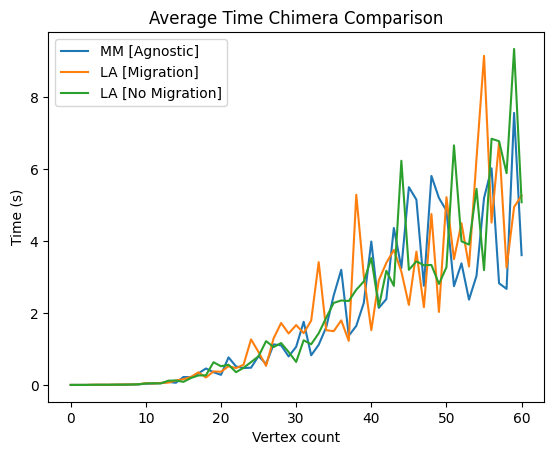

In [106]:
plt.clf()
plt.plot(ns, avg_chim_comp_agn_time)
plt.plot(ns, avg_chim_comp_lamg_time)
plt.plot(ns, avg_chim_comp_lanomg_time)
plt.legend(["MM [Agnostic]", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Average Time Chimera Comparison")
plt.show()
#plt.savefig("images/avg_comp_chimNoBC_time.png")

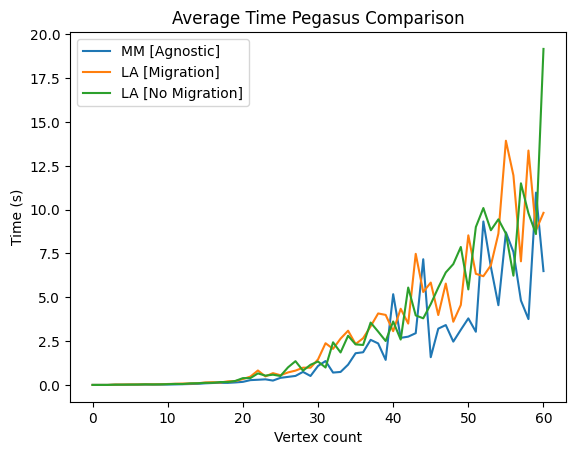

In [107]:
plt.clf()
plt.plot(ns, avg_peg_comp_agn_time)
plt.plot(ns, avg_peg_comp_lamg_time)
plt.plot(ns, avg_peg_comp_lanomg_time)
plt.legend(["MM [Agnostic]", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Average Time Pegasus Comparison")
plt.show()
#plt.savefig("images/avg_comp_pegaNoBC_time.png")

In [ ]:
plt.clf()
plt.plot(ns, avg_zeph_comp_agn_time)
plt.plot(ns, avg_zeph_comp_lamg_time)
plt.plot(ns, avg_zeph_comp_lanomg_time)
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Average Time Zephyr Comparison")
plt.show()
#plt.savefig("images/avg_comp_zephNoBC_time.png")

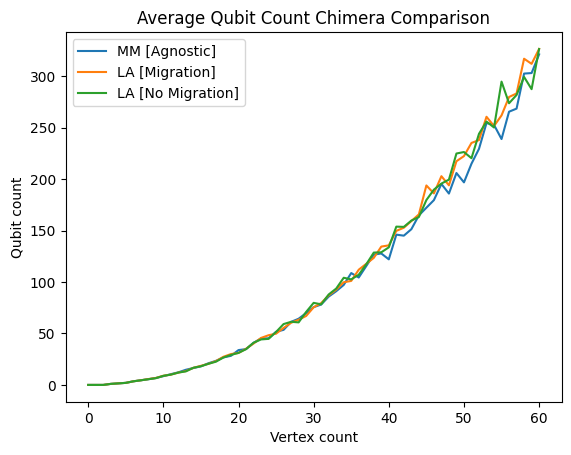

In [109]:
plt.clf()
plt.plot(ns, avg_chim_comp_agn_sum)
plt.plot(ns, avg_chim_comp_lamg_sum)
plt.plot(ns, avg_chim_comp_lanomg_sum)
plt.legend(["MM [Agnostic]", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit count")
plt.title("Average Qubit Count Chimera Comparison")
plt.show()
#plt.savefig("images/avg_comp_chimNoBC_qubitcnt.png")

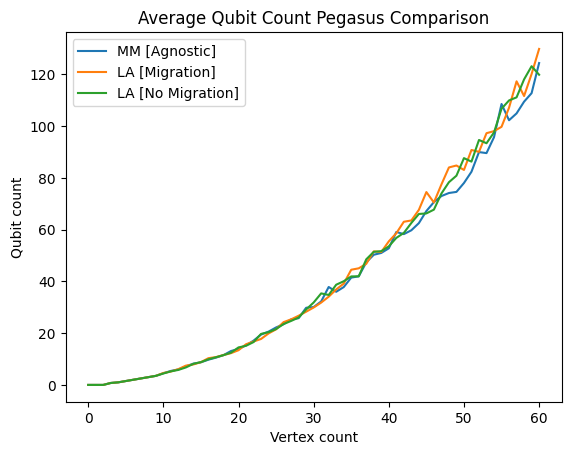

In [110]:
plt.clf()
plt.plot(ns, avg_peg_comp_agn_sum)
plt.plot(ns, avg_peg_comp_lamg_sum)
plt.plot(ns, avg_peg_comp_lanomg_sum)
plt.legend(["MM [Agnostic]", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit count")
plt.title("Average Qubit Count Pegasus Comparison")
plt.show()
#plt.savefig("images/avg_comp_pegaNoBC_qubitcnt.png")

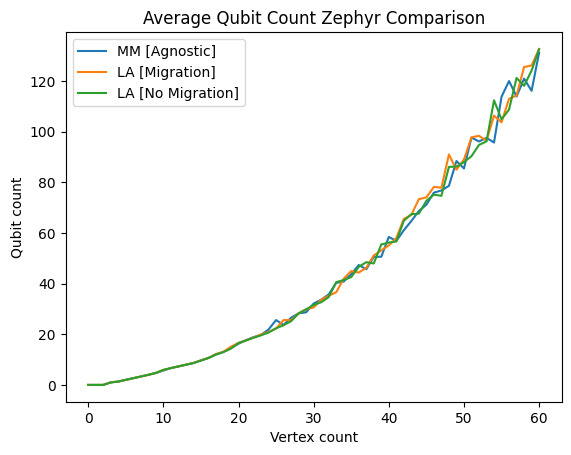

In [111]:
plt.clf()
plt.plot(ns, avg_zeph_comp_agn_sum)
plt.plot(ns, avg_zeph_comp_lamg_sum)
plt.plot(ns, avg_zeph_comp_lanomg_sum)
plt.legend(["MM [Agnostic]", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit count")
plt.title("Average Qubit Count Zephyr Comparison")
plt.show()
#plt.savefig("images/avg_comp_zephNoBC_qubitcnt.png")

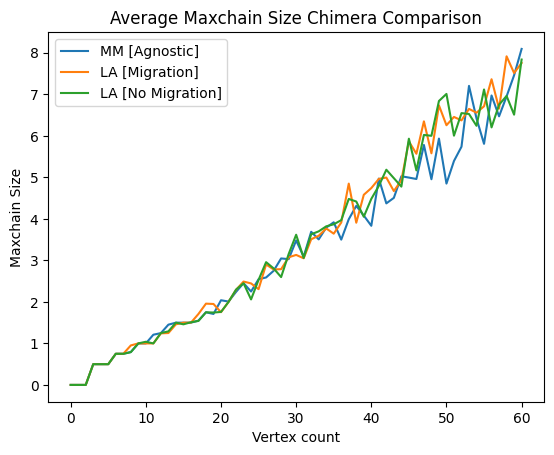

In [112]:
plt.clf()
plt.plot(ns, avg_chim_comp_agn_maxchain)
plt.plot(ns, avg_chim_comp_lamg_maxchain)
plt.plot(ns, avg_chim_comp_lanomg_maxchain)
plt.legend(["MM [Agnostic]", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Average Maxchain Size Chimera Comparison")
plt.show()
#plt.savefig("images/avg_comp_chimNoBC_maxchain.png")

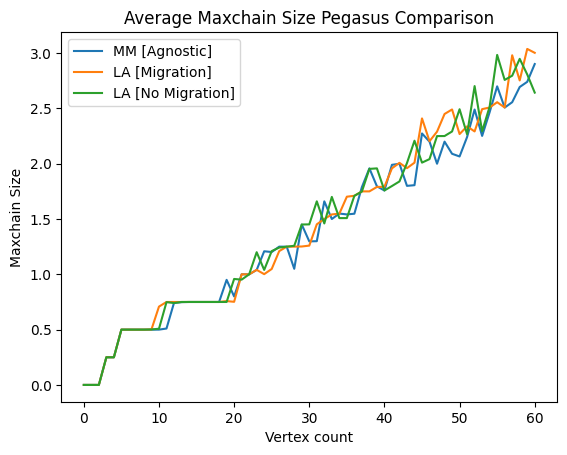

In [113]:
plt.clf()
plt.plot(ns, avg_peg_comp_agn_maxchain)
plt.plot(ns, avg_peg_comp_lamg_maxchain)
plt.plot(ns, avg_peg_comp_lanomg_maxchain)
plt.legend(["MM [Agnostic]", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Average Maxchain Size Pegasus Comparison")
plt.show()
#plt.savefig("images/avg_comp_pegaNoBC_maxchain.png")

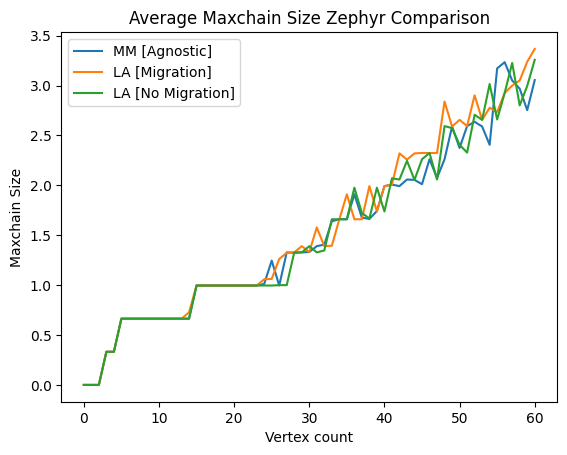

In [114]:
plt.clf()
plt.plot(ns, avg_zeph_comp_agn_maxchain)
plt.plot(ns, avg_zeph_comp_lamg_maxchain)
plt.plot(ns, avg_zeph_comp_lanomg_maxchain)
plt.legend(["MM [Agnostic]", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Average Maxchain Size Zephyr Comparison")
plt.show()
#plt.savefig("images/avg_comp_zephNoBC_maxchain.png")

In [ ]:
#############
#############

In [52]:
#### Plotting Total Points #### run each alg. 4 times and store all data

In [53]:
# set x-array to match format for y-arrays

n=61
m=4

ns_arr = [0.0]*n*m

for j in range(n):
    for i in range(4):
        ns_arr[j*m+i] = j


In [ ]:
#60total_data04_dw2000.txt & #60total_data04_p16.txt

In [54]:
all_chim_comp_agn_time= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0069270000000001275, 0.005281000000000091, 0.004900999999999822, 0.004889999999999617, 0.006905000000000605, 0.006273000000000195, 0.00604400000000016, 0.006242000000000303, 0.010467000000000226, 0.00899300000000025, 0.007457999999999743, 0.009494999999999365, 0.02059500000000014, 0.02446199999999976, 0.01869299999999985, 0.020024999999999515, 0.02616800000000019, 0.019295000000000506, 0.021717999999999904, 0.02427299999999999, 0.054399000000000086, 0.05104199999999981, 0.02941600000000033, 0.047410999999999426, 0.044942999999999955, 0.05427300000000024, 0.053746000000000294, 0.03124299999999991, 0.07789000000000001, 0.13593099999999936, 0.12255500000000019, 0.133394, 0.08920999999999957, 0.19088200000000022, 0.1444390000000002, 0.16849299999999978, 0.3221500000000006, 0.1273099999999996, 0.21773600000000037, 0.2562680000000004, 0.2576350000000005, 0.25081600000000037, 0.20142200000000088, 0.29645100000000113, 0.26519900000000085, 0.3076889999999999, 0.3358300000000014, 0.4101399999999984, 0.5338759999999994, 0.6575189999999971, 0.7944330000000015, 0.4845540000000028, 0.36838499999999996, 0.5963999999999992, 0.835917000000002, 0.9919140000000013, 1.1358340000000027, 0.7622150000000047, 1.2850830000000002, 0.7733989999999977, 1.3850629999999953, 1.1964769999999945, 0.5020930000000021, 1.8303820000000002, 1.1687500000000028, 1.5540209999999917, 1.0119529999999912, 0.9325600000000094, 0.8127470000000017, 2.7086080000000123, 1.5155600000000078, 1.229920000000007, 1.325431000000009, 1.1622610000000009, 2.11597900000001, 1.1949650000000105, 0.9369140000000016, 1.9017589999999984, 2.426129000000003, 0.9347150000000113, 1.825101999999987, 2.0492200000000196, 2.9552500000000066, 1.6520730000000015, 3.5633770000000027, 8.85376500000001, 3.689190999999994, 2.1985070000000064, 4.557667999999978, 2.0018129999999985, 4.079244999999986, 11.707284999999985, 2.562185999999997, 2.473472000000015, 3.2047230000000013, 6.252286000000026, 4.3616289999999935, 3.7691239999999766, 4.060942000000011, 6.373439000000019, 3.7568129999999655, 7.468376999999975, 6.077513999999951, 4.65662999999995, 3.5676199999999767, 2.320808999999997, 8.193891000000008, 4.31100200000003, 1.9815600000000018, 8.637819999999977, 9.218572999999992, 9.106910000000084, 6.539841999999908, 4.341764000000012, 10.87497600000006, 4.271126999999979, 7.345087000000035, 5.304687000000058, 3.833761999999979, 4.127537999999959, 11.450582999999938, 10.128314000000046, 9.89021200000002, 6.012780000000021, 3.4681299999999737, 6.930070999999998, 5.032520999999974, 4.529324999999972, 6.823781000000054, 17.66022099999998, 3.969402000000059, 15.784468999999945, 14.671017000000006, 3.374671000000035, 15.230527999999936, 8.825868000000014, 14.23111700000004, 8.157961000000114, 10.236287000000175, 4.914995999999974, 7.677793000000065, 11.057097000000113, 10.380175000000008, 10.726052999999865, 6.031504999999925, 9.397177000000056, 22.844200999999885, 23.51568999999995, 18.052033000000165, 11.759120000000166, 5.501904000000195, 14.821725000000015, 12.890671999999995, 8.448756000000003, 18.73434199999997, 14.668455999999878, 3.835448000000042, 13.21788400000014, 11.732037999999875, 18.767977999999857, 11.747981999999865, 16.35717199999999, 9.73530299999993, 19.75755799999979, 9.227210999999897, 6.979150000000118, 12.582276000000093, 15.566261999999824, 6.395629999999983, 20.32401499999969, 12.42858699999988, 9.068708999999672, 19.48909599999979, 26.527909999999792, 21.580043999999816, 7.544198999999935, 12.981456999999864, 15.803683000000092, 12.092506999999841, 15.617163999999775, 10.33469500000001, 14.389181000000008, 11.95246700000007, 16.149527000000035, 8.449497000000065, 14.414860000000317, 7.80270500000006, 7.837575999999899, 16.471440000000257, 12.553783000000294, 12.478384000000005, 11.471570000000156, 18.084805999999844, 16.699976999999762, 12.07140500000014, 8.379877999999735, 6.636043999999856, 19.154161999999815, 9.531258999999864, 25.312382999999954, 12.715961999999763, 35.68792500000018, 9.700398999999834, 26.512031000000206, 28.549846999999772, 13.764369000000443, 7.097811000000547, 12.24006399999962, 14.957735999999386, 11.31115299999965, 15.049381000000722, 21.486587000000327, 13.452144000000771, 31.799231000000873, 11.680586000000403, 26.67033100000026, 20.069532000000436, 16.268229000000247, 22.110595999999532, 14.09755800000039, 24.185731000000487, 10.325026999999864, 16.061351999999715, 25.249173000000155, 20.589945999999145, 7.828685000000405, 33.20174700000007, 16.345312000000376, 8.478063000000475, 23.274320000000444, 15.335137000000032, 10.782726999999795]
all_peg_comp_agn_time= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0290790000000003, 0.027077999999999935, 0.03168300000000013, 0.02769900000000014, 0.030216000000000243, 0.03047100000000036, 0.029938999999999716, 0.029745000000000132, 0.039674999999999905, 0.036427999999999905, 0.03911800000000021, 0.04266900000000007, 0.04918399999999945, 0.03962699999999941, 0.043363999999999514, 0.0477660000000002, 0.06953500000000012, 0.051254999999999384, 0.04933500000000013, 0.05476499999999973, 0.0614530000000002, 0.061133999999999133, 0.05785499999999999, 0.05974199999999996, 0.08186200000000099, 0.07508400000000037, 0.0827650000000002, 0.08107100000000145, 0.0956500000000009, 0.08061400000000063, 0.1040340000000004, 0.09380699999999997, 0.12007100000000115, 0.15437299999999965, 0.12250799999999984, 0.12427300000000052, 0.12515000000000143, 0.15679399999999788, 0.15543300000000215, 0.19294599999999917, 0.3390860000000018, 0.22742299999999815, 0.18912500000000065, 0.21349899999999877, 0.2342960000000005, 0.2132220000000018, 0.2688190000000006, 0.22350600000000043, 0.32820099999999996, 0.512279999999997, 0.25902900000000173, 0.39732500000000215, 0.2990920000000017, 0.5448930000000018, 0.38070600000000354, 0.3477400000000017, 0.3873259999999945, 0.38498599999999783, 0.44621899999999926, 0.31685999999999837, 0.5169890000000024, 0.6382130000000004, 0.44311000000000433, 0.5859489999999994, 1.1055799999999962, 0.7341359999999995, 0.9362740000000045, 1.1399740000000094, 0.43658700000000294, 1.025386999999995, 0.4763969999999915, 1.1605970000000099, 0.8104129999999969, 0.8562670000000026, 0.7157449999999983, 1.156878000000006, 2.4457179999999994, 1.3543710000000004, 0.5460549999999955, 0.8276390000000049, 1.7341280000000125, 1.2825009999999963, 1.3785439999999767, 1.6950019999999881, 2.155081999999993, 1.8431740000000048, 2.2795289999999966, 1.1795639999999992, 2.5720489999999927, 1.8127599999999973, 1.6624920000000145, 2.105912999999987, 2.267631999999992, 1.6906979999999976, 1.2144660000000158, 2.1877609999999947, 1.3293409999999994, 1.9139179999999953, 3.329435999999987, 1.6405710000000227, 3.1555590000000393, 3.894861999999989, 2.2448459999999955, 1.9352559999999812, 1.7768140000000017, 3.28222199999999, 6.2527090000000385, 2.7788529999999696, 5.491410999999971, 3.1152360000000385, 1.7570969999999875, 2.6950009999999907, 5.204320999999993, 3.217360000000042, 1.8408779999999751, 3.722059999999999, 6.969658999999979, 4.157457000000022, 3.010169000000019, 3.171701999999982, 5.508092000000033, 5.591613999999936, 4.138180999999918, 6.389771999999994, 6.981603000000064, 14.600679000000014, 2.8607529999999315, 13.119470999999976, 3.2920579999999973, 9.468815999999947, 4.491511999999943, 5.462888000000021, 4.050192999999922, 4.96574899999996, 5.31966900000009, 4.138953000000015, 6.14033100000006, 9.837775000000079, 3.357482000000118, 7.129618000000164, 6.102701000000025, 11.755623999999898, 6.307543000000123, 3.0527790000001005, 8.233140000000049, 7.463209000000006, 12.912176000000045, 6.606217999999899, 9.781864000000041, 7.058908000000201, 9.842100000000073, 7.534801000000016, 18.520690999999943, 5.187991000000011, 7.317606999999953, 8.528921000000082, 7.464807000000064, 11.856310000000121, 12.61049899999989, 17.68241899999998, 11.598692000000028, 5.189057999999932, 10.549722000000202, 10.840972999999849, 5.254851000000144, 16.256059999999707, 10.775470000000041, 14.30344100000002, 10.41904999999997, 10.954371999999694, 21.049183000000085, 12.966265999999905, 12.040776000000278, 16.48442900000009, 5.71381700000029, 12.611581999999999, 18.392833999999766, 9.856297999999697, 21.1052380000001, 8.668301000000156, 27.194111999999677, 32.32450300000028, 13.244818000000123, 18.775936, 8.767794000000322, 27.861081000000013, 9.869591000000128, 17.053447000000233, 7.925323999999819, 39.08677899999975, 7.0559259999999995, 23.5661869999999, 15.48569099999986, 13.948813999999402, 19.888100000000122, 8.493857999999818, 21.09413500000028, 31.66707200000019, 21.490555999999742, 10.038915000000088, 10.323679000000084, 15.117733000000044, 24.97721999999976, 10.83451999999943, 11.101959999999963, 34.44715199999973, 27.423547999999755, 22.091519000000517, 51.79289299999982, 14.24437300000045, 26.938442000000578, 45.690403000000515, 33.97763500000019, 29.114806999999928, 26.561365999999907, 39.495349999999235, 14.928572000000713, 50.28996600000028, 35.28161799999998, 24.75486599999931, 13.727269999999407, 46.18221900000026, 9.406981999999516, 34.81707800000004, 33.602499999999964, 24.37279000000035, 43.02484100000038, 29.243458999999348, 22.169897000000674, 29.56108999999924, 68.03721599999972, 22.6526700000004]

In [55]:
all_chim_comp_lamg_time= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019086999999999854, 0.019967999999999986, 0.017989000000000033, 0.021921999999999997, 0.023622000000000476, 0.02183299999999999, 0.0193449999999995, 0.019377999999999673, 0.023417999999999495, 0.020821999999999896, 0.022818000000000005, 0.024710999999999927, 0.03451399999999971, 0.04102099999999975, 0.03167600000000004, 0.10354099999999988, 0.040475000000000705, 0.052367000000000274, 0.04033499999999979, 0.03681299999999954, 0.04974299999999943, 0.049207, 0.060893000000000086, 0.046618999999999744, 0.05919499999999989, 0.07051699999999972, 0.0714699999999997, 0.07091100000000061, 0.12350200000000022, 0.1415179999999996, 0.10748099999999994, 0.11815599999999993, 0.11510399999999876, 0.1308430000000005, 0.12072299999999991, 0.13238799999999884, 0.1869039999999984, 0.16679399999999944, 0.29174900000000115, 0.23262599999999978, 0.35490700000000075, 0.23322600000000016, 0.3471650000000004, 0.2222059999999999, 0.4455150000000021, 0.7263149999999996, 0.31881800000000027, 0.3574939999999991, 1.2584550000000014, 0.6697319999999998, 0.4851819999999982, 0.960131999999998, 0.5460419999999999, 0.5918920000000014, 0.9581050000000033, 0.5517210000000006, 1.5627270000000024, 0.9377059999999986, 1.3871290000000016, 0.8069199999999981, 1.3193589999999986, 1.2294569999999965, 0.8046409999999966, 0.996578999999997, 2.3157759999999996, 0.8850709999999964, 1.6079089999999923, 1.927818000000002, 0.9652539999999874, 1.7079059999999942, 1.311988999999997, 1.2186519999999916, 4.6425649999999905, 0.9982830000000007, 4.239162999999991, 2.637584000000004, 1.5841349999999892, 1.8127819999999986, 1.5447049999999933, 2.819502, 3.2254839999999945, 2.134931999999992, 2.746375999999998, 2.0617470000000253, 2.9034340000000043, 1.3979089999999985, 2.0587270000000046, 2.919162, 1.960994999999997, 5.1697929999999985, 2.3679929999999842, 4.672690999999986, 4.88413300000002, 3.5069689999999696, 2.2742790000000355, 2.243739000000005, 5.464964000000009, 5.393515999999977, 2.0108299999999986, 6.390436999999963, 4.390315999999984, 5.64164599999998, 2.9717279999999846, 5.225225000000023, 5.829422000000022, 3.892470000000003, 2.6317170000000374, 4.97409399999998, 3.7604120000000307, 8.258596000000011, 6.464620000000025, 2.7163510000000315, 3.1753170000000637, 4.022765999999933, 5.609569000000079, 8.305222999999955, 2.6774259999999686, 4.454304999999977, 4.335287999999991, 5.264987000000019, 9.219550000000027, 6.480201999999963, 10.367081000000098, 2.7251489999999876, 12.079730999999924, 9.550122999999985, 5.427731999999992, 9.67482700000005, 4.232583000000091, 8.275775000000067, 3.742396000000099, 9.799998999999957, 8.19306800000004, 12.853017999999906, 4.980311000000029, 11.845866000000001, 15.799721999999974, 7.506405000000086, 4.23183999999992, 4.527826999999888, 8.888026000000082, 7.305057999999917, 5.576483999999937, 8.411875999999893, 11.409430000000157, 12.269562999999835, 9.094077999999854, 8.694074, 4.050018999999793, 10.811875999999984, 13.756151000000045, 17.778097000000116, 7.726472999999942, 9.202201999999943, 6.997681000000057, 8.60011499999996, 14.264627000000019, 6.309022999999797, 16.82379500000002, 7.379326999999876, 14.250802000000022, 27.80854599999998, 8.397490999999945, 16.615408000000116, 10.387766000000283, 7.396751000000222, 18.904465000000073, 13.779745999999705, 17.58748800000012, 8.860467999999855, 13.755607000000055, 20.939810999999736, 15.349092999999812, 20.57286699999986, 15.743057000000135, 17.959823000000142, 30.69968599999993, 17.45778300000029, 14.411885999999868, 23.69529199999988, 20.006790999999794, 26.11489100000017, 11.479937000000064, 15.503833999999642, 14.314315999999963, 28.66539399999965, 20.837822999999844, 8.205711999999949, 14.334667999999965, 17.304217999999764, 18.532432999999855, 18.801662999999735, 25.802500000000236, 8.766259999999875, 13.656880999999885, 9.636014999999588, 11.08014600000024, 17.416287999999895, 12.528075000000172, 18.33417499999996, 15.156031999999868, 10.246795999999904, 21.75028599999996, 22.024581000000126, 12.21662200000037, 11.6841459999996, 18.702871999999843, 10.382580000000416, 24.842462999999952, 24.137118000000555, 24.657524999999623, 29.40556699999979, 28.729319000000032, 23.812199999999393, 12.9621989999996, 19.105937999999696, 16.631999999999607, 11.926879999999983, 18.995702999999594, 31.019086000000243, 20.41294099999959, 20.55163100000027, 14.223836999999548, 16.003335999999763, 17.86219600000004, 18.209356999999727, 19.334138000000166, 15.313280000000304, 26.310661999999866, 41.419520999999804, 24.128295999999864, 30.039076000000023]
all_peg_comp_lamg_time= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0833330000000001, 0.07876499999999975, 0.08038200000000018, 0.08242799999999972, 0.08157999999999976, 0.08010500000000054, 0.07983999999999991, 0.08048199999999994, 0.09049899999999944, 0.08640899999999974, 0.09392800000000001, 0.08832400000000007, 0.10489899999999963, 0.0984670000000003, 0.20530699999999946, 0.10595300000000041, 0.11667000000000005, 0.10620999999999992, 0.10360300000000056, 0.10721999999999987, 0.12504599999999932, 0.1208910000000003, 0.1237699999999986, 0.1278630000000014, 0.13333499999999887, 0.15437000000000012, 0.14925299999999986, 0.14607299999999945, 0.18130000000000024, 0.18172100000000135, 0.19077200000000083, 0.18301000000000123, 0.21269099999999952, 0.22059499999999943, 0.21262700000000123, 0.1993190000000009, 0.31927600000000034, 0.32624999999999815, 0.34831199999999995, 0.29777699999999996, 0.3237719999999982, 0.3315009999999994, 0.35127800000000065, 0.28608799999999945, 0.3964099999999995, 0.5704080000000005, 0.3778819999999996, 0.5616340000000015, 0.5126760000000026, 0.5355330000000009, 0.589852999999998, 0.643416000000002, 0.6417300000000026, 0.6769530000000046, 0.6370580000000032, 0.5315240000000045, 0.7237349999999978, 0.8842580000000027, 0.6575259999999972, 0.6581729999999979, 0.8115030000000019, 0.7117930000000001, 0.7547250000000005, 0.7944589999999963, 0.8694930000000056, 1.069738000000001, 0.888809000000002, 0.7625290000000007, 0.8778060000000067, 0.9085399999999879, 0.8683970000000016, 0.9425710000000009, 1.541411999999994, 2.227903999999995, 1.9790189999999939, 1.658370000000005, 2.792823999999996, 2.189374000000001, 1.8083599999999933, 2.3214690000000076, 1.8326879999999903, 3.2460880000000003, 2.8843320000000006, 1.9710429999999803, 2.4010879999999872, 1.876310999999987, 2.8699770000000058, 1.7710739999999987, 1.6576330000000041, 3.569734000000011, 1.8509559999999965, 1.974016000000006, 1.9698039999999821, 3.3748980000000017, 2.8966369999999984, 2.8033949999999948, 3.1189720000000136, 3.446678999999989, 3.7321120000000008, 3.3018600000000333, 3.973350000000039, 5.384413000000052, 3.4182989999999904, 4.745845999999972, 5.055101999999977, 5.007156000000009, 8.77567399999998, 5.40394299999997, 7.638678000000027, 5.756020000000035, 4.281039000000021, 4.3406759999999736, 5.054022000000032, 3.2579939999999965, 12.081458999999995, 9.20228400000002, 8.738873999999953, 8.351099999999974, 6.009492000000023, 7.789710000000014, 6.144123000000036, 8.562184000000002, 8.95710500000007, 4.929257000000007, 10.718181999999956, 8.040526, 11.962535000000003, 10.252328000000034, 12.81129199999998, 8.098659999999995, 12.868657999999982, 8.399463000000083, 10.057304000000045, 5.872308000000089, 15.546146000000022, 9.252688000000035, 10.912120999999956, 11.527783999999997, 10.530692000000045, 16.976220000000012, 13.1296719999998, 14.128717999999935, 8.872957000000042, 30.494282000000112, 18.130655999999817, 12.39298000000008, 16.102533999999878, 6.785482000000002, 17.633660999999847, 20.779780000000073, 12.955079999999953, 13.476511999999957, 11.107588000000078, 10.24433799999997, 11.805238000000145, 23.386547000000064, 18.90412900000001, 35.76998200000003, 14.2783629999999, 9.408560999999963, 57.09989900000005, 17.75536699999998, 18.176378999999997, 16.862266999999974, 26.487272999999732, 13.482696000000033, 17.28930799999989, 20.88906599999973, 41.521548000000166, 17.541801999999734, 20.203168000000005, 20.357574999999997, 21.63775200000009, 21.133670000000166, 29.92900899999995, 12.301249000000098, 32.53387799999973, 21.390150000000176, 16.027725999999802, 37.921014000000014, 23.51353700000027, 21.011101999999937, 25.80475000000024, 37.514170999999806, 35.55347499999971, 46.09762899999987, 30.456236999999874, 12.201396999999815, 50.18095399999993, 24.307384000000184, 18.928387999999813, 57.809463999999934, 39.99423099999967, 33.32555300000058, 21.120733999999175, 21.12623900000017, 17.106245999999373, 34.21064100000058, 25.969790000000103, 36.25679599999967, 24.24509599999965, 19.56599599999936, 27.135776000000078, 19.630968999999823, 37.909122000000025, 31.418149000000085, 53.50235900000007, 35.97951099999955, 53.180076000000554, 35.80131000000074, 38.811179000000266, 47.2438430000002, 29.86535499999991, 49.125662000000375, 30.14085999999952, 49.94674099999975, 18.950560999999652, 54.18914399999994, 43.44186300000001, 76.26689600000009, 45.28049799999917, 50.33542599999964, 44.867339999999786, 45.455259999999726, 58.285633999999845, 38.364228999999796, 25.716779000000315, 43.15793600000052, 31.414787000000615, 20.79373299999952, 46.898943000000145, 41.87292600000001]

In [56]:
all_chim_comp_lanomg_time= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014444000000000123, 0.01128299999999971, 0.011345000000000383, 0.011974999999999625, 0.01502400000000037, 0.013704999999999856, 0.012809000000000736, 0.01311599999999924, 0.016818999999999917, 0.015054000000000123, 0.015033999999999992, 0.01484400000000008, 0.025799000000000127, 0.025717999999999464, 0.02843899999999966, 0.024970000000000603, 0.031213000000000157, 0.034084999999999255, 0.032401000000000124, 0.03031499999999987, 0.042284999999999684, 0.0396510000000001, 0.04085499999999964, 0.03693999999999953, 0.05106800000000078, 0.056540000000000035, 0.059942000000000384, 0.052224000000000714, 0.1971999999999996, 0.1726289999999997, 0.11657299999999982, 0.1086469999999995, 0.13961499999999916, 0.1333359999999999, 0.0890500000000003, 0.1037770000000009, 0.15372100000000088, 0.16571300000000022, 0.2697850000000006, 0.2528100000000002, 0.17381400000000014, 0.2818360000000002, 0.23750599999999977, 0.2484939999999991, 0.46919300000000064, 0.7963360000000002, 0.9057899999999997, 0.35438199999999753, 0.6448329999999984, 0.7282079999999986, 0.3414040000000007, 0.35807500000000303, 1.5141050000000007, 0.4228920000000045, 0.6372769999999974, 0.7730850000000018, 1.647235000000002, 1.701943, 0.5428780000000017, 1.340835999999996, 1.912855999999998, 0.8073550000000012, 0.7011980000000051, 1.625433000000001, 0.7942910000000012, 1.4061679999999939, 1.7218980000000101, 1.0502819999999957, 2.335585000000009, 1.417580000000001, 1.980310000000003, 0.9338599999999957, 2.4265390000000053, 1.6050189999999986, 1.492447999999996, 1.9874379999999974, 1.1702109999999948, 1.5952910000000031, 1.1938590000000033, 1.041910999999999, 2.0189080000000104, 4.208729000000005, 1.4480420000000152, 1.5776620000000037, 3.9521489999999915, 1.2447540000000004, 1.3667499999999961, 2.9092689999999948, 3.579642999999976, 1.9072529999999972, 4.76369200000002, 5.333888999999999, 2.358374999999967, 3.108618999999976, 1.8445670000000405, 2.1299339999999916, 5.6968369999999595, 1.591745000000003, 4.825987999999995, 3.4136009999999715, 3.9770919999999705, 5.7745180000000005, 2.8244129999999927, 8.341267000000016, 4.6788139999999885, 2.23549399999996, 4.200003000000038, 2.948783999999989, 2.3778090000000134, 3.055031999999983, 4.270919999999933, 5.452656000000047, 3.1854589999999234, 5.750184999999988, 3.122963000000027, 4.760862999999972, 3.369269000000031, 8.169488000000001, 4.798170000000027, 4.392041999999947, 2.402956999999901, 4.4531749999999874, 4.000301000000036, 10.492811999999958, 5.220893000000046, 11.775245999999925, 3.2247089999999616, 2.8090290000000095, 5.888589999999908, 5.998694, 3.180633000000057, 2.9723300000000563, 9.60135600000001, 3.7983410000000504, 10.956521000000066, 17.67141400000014, 12.308135999999877, 7.599805999999944, 16.96446900000001, 6.489738999999872, 29.782353000000057, 5.526234000000159, 17.061674999999923, 9.005371999999852, 8.699409999999943, 11.02165500000001, 13.446127999999817, 8.092237999999952, 10.374377000000095, 10.296472999999878, 11.030307999999877, 10.933285999999953, 13.371000999999978, 20.721967000000177, 20.273179000000027, 23.77921000000015, 15.873229000000038, 21.38160199999993, 22.65266900000006, 13.716826999999967, 31.144203999999945, 12.008810999999923, 11.794765999999981, 21.460177999999814, 12.050514000000021, 16.80526000000009, 5.889447000000018, 8.918135999999777, 15.898544000000129, 15.857789000000139, 8.44079499999998, 20.212344999999914, 9.063724000000093, 12.599690999999893, 19.867842999999993, 11.947229000000334, 12.31713499999978, 37.07723699999997, 10.638266999999814, 22.29177000000027, 18.850334000000203, 21.631748999999672, 18.751258000000234, 30.69005500000003, 25.30323300000009, 18.22806700000001, 19.31256200000007, 11.929493000000093, 15.261327000000165, 10.03046699999959, 12.037403000000268, 21.237159000000247, 23.837333999999828, 18.244352000000163, 10.541579000000183, 15.074593000000277, 19.47036100000014, 8.392605999999887, 26.573585999999978, 24.51191000000017, 33.051008000000365, 20.42094599999973, 52.95108399999981, 21.2727289999998, 17.878993999999693, 12.629946000000018, 34.54581099999996, 18.08308399999987, 9.531709999999293, 19.252488999999514, 18.174573000000237, 11.740607999999156, 20.300280999999814, 21.633186000000023, 33.33569499999976, 13.369150999999874, 9.392522000000099, 27.653306000000157, 25.201998999999887, 31.78990199999953, 13.955567999999403, 26.327770999999302, 33.49624700000004, 28.164694000000054, 13.770556999999826, 20.914380999999594, 24.24177200000031, 48.036613999999645, 21.90792799999963, 28.73062100000061, 13.994664999999259, 22.456444999999803]
all_peg_comp_lanomg_time= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061549999999999994, 0.057942999999999856, 0.056080999999999825, 0.061628999999999934, 0.06120999999999999, 0.060778, 0.06340600000000052, 0.061003999999999614, 0.0688620000000002, 0.07234300000000005, 0.07437299999999958, 0.07418800000000036, 0.08270299999999953, 0.0948739999999999, 0.08431899999999981, 0.08422900000000055, 0.10277400000000014, 0.09648699999999977, 0.09132500000000032, 0.09085899999999913, 0.10556800000000166, 0.113232, 0.10784899999999986, 0.11049500000000023, 0.12486400000000053, 0.13831299999999835, 0.13316599999999923, 0.15312199999999976, 0.14889699999999984, 0.16271400000000114, 0.18231100000000033, 0.19117600000000046, 0.1892169999999993, 0.20722600000000035, 0.19518700000000067, 0.18565599999999982, 0.33386099999999885, 0.4067620000000005, 0.2815949999999994, 0.2984599999999986, 0.4745290000000004, 0.4772350000000003, 0.3193609999999971, 0.29790399999999906, 0.6359259999999978, 0.5699109999999976, 0.3616289999999971, 0.45118799999999837, 0.6836950000000002, 0.4616979999999984, 0.5075470000000024, 0.6143070000000037, 0.6181570000000036, 0.5283310000000014, 0.5545790000000039, 0.7787459999999982, 0.8020329999999944, 0.7262659999999954, 0.7083009999999987, 0.5708300000000008, 0.6335509999999971, 0.6123359999999991, 0.7061340000000058, 0.748234999999994, 1.1771129999999985, 0.9874399999999994, 0.6971349999999887, 0.6970769999999931, 1.2886639999999971, 1.097377999999992, 1.2381239999999991, 1.4055239999999998, 1.2973730000000074, 1.3914330000000064, 1.6498500000000007, 1.4297590000000042, 1.6831049999999976, 1.630338000000009, 2.1415310000000005, 1.2757840000000016, 2.3715310000000045, 1.6277839999999912, 2.1279289999999946, 2.9615619999999865, 1.688254999999998, 1.6712330000000009, 3.5618169999999907, 2.109611000000001, 3.3980630000000076, 3.6277880000000096, 3.819666000000012, 2.3944440000000213, 3.8692500000000223, 3.269886000000014, 2.357937000000021, 2.641609999999986, 3.7208540000000028, 2.403156999999993, 7.181240000000031, 3.3117369999999937, 2.6538189999999986, 3.817288000000019, 5.0796080000000075, 4.249360000000024, 2.7915459999999825, 6.284705000000031, 5.679086999999981, 5.363611999999989, 3.6253739999999652, 5.6720450000000255, 8.689755999999988, 5.5453130000000215, 5.776211000000046, 11.186644000000001, 4.655547000000013, 3.8288570000000277, 5.1034499999999525, 8.538515999999959, 8.418687999999975, 4.849423000000002, 6.9086770000000115, 4.568843000000015, 4.795646000000033, 10.271734000000038, 4.997789000000012, 9.02024300000005, 11.180029999999988, 10.985509999999977, 11.709132999999952, 8.94664499999999, 12.430185000000051, 8.274616000000037, 21.982764999999972, 5.363386000000105, 11.306948000000034, 13.648635000000013, 8.241192999999953, 12.514257999999927, 10.499963999999864, 17.438198000000057, 15.273386000000073, 13.818597999999838, 6.348381000000018, 8.969475999999986, 14.173770999999988, 17.77461600000015, 10.796730999999909, 19.844828000000007, 13.231903000000102, 28.923168000000032, 13.579707999999982, 14.117392999999993, 21.741596999999956, 9.052150999999867, 8.531672999999955, 9.828425000000152, 27.131079999999884, 22.88095199999998, 26.731943, 13.155203999999912, 8.697036000000026, 18.781694000000016, 10.196201000000201, 17.045260000000326, 13.08306900000025, 20.022973999999977, 12.894303000000036, 14.816487999999936, 14.105883000000176, 16.569688999999926, 32.87457799999993, 16.41416100000015, 56.52268200000026, 15.848582000000079, 14.75804799999969, 29.747112000000016, 28.309547000000293, 24.74321800000007, 30.593953000000056, 18.156469000000016, 49.13954700000022, 18.76146800000015, 47.30741399999988, 24.857398999999987, 52.49425100000008, 11.881854999999632, 14.901221999999962, 22.15587400000004, 29.16483900000003, 26.27050199999985, 22.457942000000003, 29.71439199999986, 29.61149599999999, 29.084052000000156, 24.88448100000005, 43.44810000000052, 36.267729999999574, 26.79392199999984, 25.90055200000006, 53.02540399999998, 25.07549199999994, 32.85519100000056, 43.59463700000015, 29.16804299999967, 10.241619999999784, 52.416659000000436, 41.72296399999959, 46.381876000000375, 32.60219700000016, 33.76321900000039, 53.99183699999958, 34.36855300000025, 51.486941000000115, 48.11776700000064, 50.45560800000021, 68.10304300000007, 57.01294599999983, 28.506029000000126, 32.6933939999999, 44.527873, 37.299463999999716, 27.36705400000028, 41.99148999999943, 43.78327200000058, 44.349159999999756, 50.57684100000006, 31.554059000000052, 38.410313000000315, 35.215713999999934, 23.028588000000127, 66.35457200000019, 42.54421199999979]

In [ ]:
#mm_comp_out_run2.txt & all_mm_comp_out_zrun1.txt

In [57]:
all_chim_comp_bc_time= [0.005805999999999756, 0.0038469999999994897, 0.006930999999999798, 0.0037690000000001334, 0.004144999999999399, 0.003771000000000413, 0.0037370000000001014, 0.004250000000000753, 0.006039999999999601, 0.004843000000000153, 0.007317000000000462, 0.006814999999999571, 0.005301000000000222, 0.003785999999999845, 0.005449000000000481, 0.003962999999999717, 0.004970000000000141, 0.0038049999999998363, 0.00387000000000004, 0.006569999999999965, 0.0061629999999999185, 0.005250000000000199, 0.003889999999999283, 0.0037709999999995247, 0.0070230000000002235, 0.00371900000000025, 0.004061999999999344, 0.004574999999999996, 0.004120999999999597, 0.003782000000000174, 0.003916999999999504, 0.005958000000000574, 0.005433000000000021, 0.003782000000000174, 0.0036839999999997985, 0.003829999999999778, 0.007187999999999306, 0.004077000000000552, 0.004936999999999969, 0.0055560000000003384, 0.005715000000000359, 0.0038289999999996382, 0.004394000000000453, 0.005531999999999648, 0.005298000000000691, 0.005783000000000094, 0.0038320000000000576, 0.004335999999999451, 0.007372999999999408, 0.0038559999999998595, 0.0038640000000000896, 0.0038109999999997868, 0.006123999999999796, 0.004367999999999483, 0.004445000000000476, 0.004023999999999361, 0.006663999999998893, 0.0038810000000015776, 0.0038820000000008292, 0.003814000000000206, 0.007100999999998692, 0.003769999999999385, 0.0037650000000013506, 0.0037389999999994927, 0.0071870000000000545, 0.003754999999999953, 0.0039130000000007215, 0.0038000000000000256, 0.007460999999999274, 0.00417299999999976, 0.004812000000001149, 0.0036769999999997083, 0.007051999999999836, 0.0038999999999997925, 0.003765999999998826, 0.003942999999999586, 0.0069710000000000605, 0.003720999999998753, 0.0037679999999991054, 0.0037359999999999616, 0.007248999999999839, 0.0037640000000003226, 0.0037330000000004304, 0.0038359999999997285, 0.007490999999999914, 0.0037180000000009983, 0.003970999999999947, 0.0041919999999997515, 0.007208999999999577, 0.0038919999999986743, 0.003750000000000142, 0.0037599999999997635, 0.007291999999999632, 0.0034919999999996065, 0.004539000000001181, 0.0034570000000009315, 0.004825999999999553, 0.003736999999999213, 0.0034599999999986863, 0.0037639999999985463, 0.00619700000000023, 0.004837999999999454, 0.0034720000000003637, 0.004459000000000657, 0.004585999999999757, 0.0035970000000009605, 0.004231000000000762, 0.004118000000000066, 0.0044240000000002055, 0.003446000000000282, 0.004422999999999178, 0.003591000000000122, 0.004395000000000593, 0.003453999999999624, 0.004224999999999923, 0.0034519999999993445, 0.0047680000000003275, 0.0048130000000004, 0.0034609999999997143, 0.0037239999999982842, 0.003942999999999586, 0.003456999999999155, 0.0034890000000000754, 0.003960999999998549, 0.0053560000000008046, 0.004132000000000247, 0.0034620000000007423, 0.003456999999999155, 0.004260999999999626, 0.004223999999998895, 0.0034909999999985786, 0.004000999999998811, 0.005041000000000295, 0.003959999999999297, 0.003732000000001179, 0.0034610000000014907, 0.003997000000000028, 0.0034810000000007335, 0.003531000000000617, 0.003462999999999994, 0.004338999999999871, 0.007108000000000558, 0.0041569999999993, 0.003532000000001645, 0.004808999999999841, 0.0034600000000004627, 0.003458000000000183, 0.003449999999999065, 0.0042559999999998155, 0.003470000000000084, 0.0035500000000006082, 0.0034969999999994172, 0.004557999999999396, 0.003523000000001275, 0.003486999999999796, 0.004558000000001172, 0.004834999999999923, 0.003474999999999895, 0.004317000000000348, 0.003498999999999697, 0.004072999999999993, 0.00391200000000147, 0.003465999999999525, 0.004240000000001132, 0.004049999999999443, 0.004132999999999498, 0.003491000000000355, 0.0034730000000013916, 0.0041570000000010765, 0.003453999999999624, 0.003731000000000151, 0.0034600000000004627, 0.0049309999999991305, 0.004014999999998992, 0.004021999999999082, 0.0038359999999997285, 0.0044010000000014315, 0.003479000000000454, 0.004113999999999507, 0.004110999999999976, 0.0048040000000000305, 0.003498999999999697, 0.0037909999999996558, 0.0037869999999990966, 0.004223999999998895, 0.004495999999999611, 0.003465999999999525, 0.003483000000001013, 0.005243000000000109, 0.003575000000001438, 0.0034840000000002647, 0.0035020000000010043, 0.003939000000000803, 0.0034719999999985873, 0.004508999999998764, 0.0034720000000003637, 0.004735999999999407, 0.003479000000000454, 0.004295000000000826, 0.00450400000000073, 0.00417500000000004, 0.003462999999999994, 0.003481999999999985, 0.0038079999999993674, 0.004265000000000185, 0.003721999999999781, 0.0034759999999991464, 0.003444999999999254, 0.005320000000001102, 0.0044789999999999, 0.0034729999999996153, 0.0035080000000000666, 0.004076999999998776, 0.0034540000000014004, 0.004623999999999739, 0.003462999999999994, 0.0034790000000022303, 0.003966999999999388, 0.004236000000002349, 0.0034999999999989484, 0.004111000000001752, 0.0034549999999988756, 0.003875000000000739, 0.0034780000000012024, 0.005160999999997529, 0.003615999999997399, 0.0036769999999997083, 0.0038380000000017844, 0.0043720000000000425, 0.0034959999999983893, 0.0034759999999991464, 0.0034610000000014907, 0.004979999999999762, 0.004165000000000418, 0.0034620000000025186, 0.0034530000000003724, 0.004346999999999213, 0.003522000000000247, 0.004354000000002856, 0.0034810000000007335, 0.004043000000002905, 0.003996999999998252, 0.00379599999999769, 0.003600000000002268]
all_peg_comp_bc_time=[0.05156100000000041, 0.0552589999999995, 0.05937000000000037, 0.050201000000000384, 0.04998099999999983, 0.04551800000000039, 0.051136999999999766, 0.054218999999999795, 0.06885500000000011, 0.058396000000000114, 0.05239700000000003, 0.05552499999999938, 0.050213000000000285, 0.05383700000000058, 0.05260199999999937, 0.05651500000000009, 0.06236400000000053, 0.05587500000000034, 0.055130999999999375, 0.05505099999999974, 0.05291600000000063, 0.05041999999999991, 0.048649000000000164, 0.047892000000000046, 0.050512000000000334, 0.05176999999999943, 0.05493900000000007, 0.05443800000000021, 0.048479999999999634, 0.05109600000000025, 0.07341900000000035, 0.054660999999999405, 0.05487199999999959, 0.05673900000000032, 0.048512999999999806, 0.05071400000000015, 0.052356999999999765, 0.05339600000000022, 0.05938100000000013, 0.059483000000000175, 0.055921000000000554, 0.05402099999999965, 0.053312000000000026, 0.05524099999999965, 0.05820100000000039, 0.05335599999999996, 0.05527499999999996, 0.055150000000000254, 0.05817599999999956, 0.047450000000000436, 0.04810099999999995, 0.05256900000000009, 0.0550739999999994, 0.05614900000000134, 0.058345999999998455, 0.05611899999999892, 0.060394999999999754, 0.05506299999999875, 0.04719000000000051, 0.052182999999999424, 0.05509499999999967, 0.050212000000000145, 0.04718299999999864, 0.05097000000000129, 0.05305800000000005, 0.047890999999999906, 0.052392000000001104, 0.05441399999999952, 0.05838300000000096, 0.050508999999999915, 0.04902599999999957, 0.0510660000000005, 0.05302000000000007, 0.047137000000001095, 0.046338999999999686, 0.05185400000000051, 0.05149399999999993, 0.045110000000001094, 0.050969999999999516, 0.04981499999999883, 0.04982500000000023, 0.047232999999998526, 0.04744499999999974, 0.050178999999999974, 0.05389100000000013, 0.05152499999999982, 0.05332699999999946, 0.04926400000000086, 0.054365999999999914, 0.04661800000000049, 0.04731499999999933, 0.05142900000000061, 0.0497999999999994, 0.04529299999999914, 0.04566499999999962, 0.045372999999999664, 0.04620099999999994, 0.042621999999999716, 0.05037400000000147, 0.051935000000000286, 0.07961100000000165, 0.044629999999999725, 0.04754900000000006, 0.051544999999999064, 0.04539000000000115, 0.05239699999999914, 0.04700299999999835, 0.049090999999998886, 0.048902, 0.05215300000000056, 0.048826000000000036, 0.049122000000000554, 0.04843699999999984, 0.048075000000000756, 0.04528299999999952, 0.04609899999999989, 0.04979399999999856, 0.046651000000000664, 0.047420000000000684, 0.04992999999999981, 0.046803000000000594, 0.04486499999999971, 0.04579700000000031, 0.043715000000000614, 0.04673000000000016, 0.043252999999999986, 0.04411499999999968, 0.04849200000000131, 0.046789000000000414, 0.048627999999999005, 0.045550000000000423, 0.0445480000000007, 0.04687999999999981, 0.04765300000000039, 0.04273799999999994, 0.04766500000000029, 0.04468199999999989, 0.045844999999999914, 0.04520199999999974, 0.04822599999999966, 0.048500999999999905, 0.045824999999998894, 0.04793799999999848, 0.04577800000000032, 0.04898999999999987, 0.04547400000000046, 0.04485500000000009, 0.048636999999999375, 0.048811000000000604, 0.05027799999999871, 0.04586500000000093, 0.04628300000000074, 0.0490630000000003, 0.045414000000000954, 0.04514099999999921, 0.04628699999999952, 0.049735000000000085, 0.043829999999999814, 0.048234000000000776, 0.05016499999999979, 0.046796999999999755, 0.04487699999999961, 0.043390000000000484, 0.04549300000000045, 0.048470999999999265, 0.04521500000000067, 0.04380600000000001, 0.04471599999999931, 0.047820999999999, 0.04534600000000033, 0.04617500000000163, 0.045889999999999986, 0.04472200000000015, 0.04703699999999955, 0.04633700000000118, 0.04327499999999951, 0.043750000000001066, 0.04403299999999888, 0.04747000000000057, 0.04823999999999984, 0.05030499999999982, 0.04500700000000002, 0.04779599999999995, 0.047563000000000244, 0.04611699999999885, 0.04672000000000054, 0.04516800000000032, 0.048491000000000284, 0.04772100000000101, 0.04499599999999937, 0.045099000000000444, 0.04441899999999954, 0.04233399999999854, 0.04750200000000149, 0.04637199999999986, 0.048542000000001195, 0.048030999999999935, 0.046149999999999025, 0.04341799999999907, 0.04499099999999956, 0.04856200000000044, 0.04517600000000144, 0.044746999999999204, 0.05191999999999908, 0.049498999999997295, 0.04608300000000298, 0.04508100000000326, 0.046151999999999305, 0.04998099999999894, 0.04672700000000063, 0.04242400000000046, 0.04333000000000098, 0.04452399999999912, 0.04564200000000085, 0.047139000000001374, 0.04334699999999714, 0.04569799999999802, 0.04740899999999826, 0.04619899999999788, 0.04497199999999779, 0.044508000000000436, 0.04735700000000165, 0.04492799999999875, 0.048266000000001696, 0.04544699999999935, 0.04810600000000065, 0.05359199999999831, 0.04504100000000122, 0.05103900000000294, 0.0449649999999977, 0.04535200000000117, 0.04448799999999764, 0.048448999999997966, 0.045932999999998, 0.04516900000000135, 0.045067999999997, 0.04672899999999913, 0.048514000000000834, 0.04430500000000137, 0.04316400000000087, 0.048763000000001, 0.049067999999998335, 0.04513700000000043, 0.0458720000000028]
all_zeph_comp_bc_time= [0.1094279999997525, 0.09113999999999578, 0.09468100000003687, 0.09084799999982351, 0.08987200000001394, 0.09322100000008504, 0.08882600000015373, 0.1006270000002587, 0.09457199999997101, 0.09376899999961097, 0.09807100000034552, 0.09662100000014107, 0.09379799999987881, 0.09182600000031016, 0.08724499999971158, 0.08435899999994945, 0.08874199999991106, 0.09077099999967686, 0.10034300000006624, 0.08704699999998411, 0.08556099999987055, 0.09209499999997206, 0.09274300000015501, 0.10300299999971685, 0.09323099999983242, 0.09183000000030006, 0.08670699999993303, 0.09425599999985934, 0.09499800000003233, 0.09105200000021796, 0.08725000000004002, 0.09450599999991027, 0.08941700000013952, 0.08558300000004238, 0.08946700000024066, 0.08926800000017465, 0.09270299999980125, 0.09054900000000998, 0.08962199999996301, 0.0959419999999227, 0.09450900000001639, 0.08856599999990067, 0.09350499999982276, 0.09342199999991863, 0.09103300000015224, 0.09146700000019337, 0.08846600000015314, 0.09103300000015224, 0.09609499999987747, 0.08728100000007544, 0.09200099999998201, 0.0945899999996982, 0.09492000000000189, 0.09076199999981327, 0.08990200000016557, 0.09205900000006295, 0.09484100000008766, 0.08860999999978958, 0.09028600000010556, 0.08731299999999464, 0.09810400000014852, 0.08760699999993449, 0.09200300000020434, 0.09089300000005096, 0.09523200000012366, 0.08885400000008303, 0.09148700000014287, 0.08653000000003885, 0.09849899999971967, 0.09616100000039296, 0.08996899999965535, 0.09191000000009808, 0.09108500000002095, 0.09148700000014287, 0.0927839999999378, 0.08902299999999741, 0.09448500000007698, 0.08708900000010544, 0.09126599999990503, 0.09116500000027372, 0.08950200000026598, 0.0888529999997445, 0.08476699999982884, 0.09376799999972718, 0.09679999999980282, 0.09150599999975384, 0.08638600000040242, 0.08998199999996359, 0.09356100000013612, 0.09388799999987896, 0.09279100000003382, 0.0911100000002989, 0.09728399999994508, 0.09206500000027518, 0.09079900000006091, 0.08945800000037707, 0.11957699999993565, 0.09455400000024383, 0.09341399999993882, 0.1042779999997947, 0.09470400000009249, 0.11224599999968632, 0.08371399999987261, 0.0904089999999087, 0.09998700000005556, 0.08525999999983469, 0.0893860000001041, 0.08939700000019002, 0.09002699999973629, 0.08870299999989584, 0.09554200000002311, 0.0907720000000154, 0.09386199999971723, 0.0900259999998525, 0.09399100000018734, 0.0899970000000394, 0.09263400000008915, 0.08723700000018653, 0.089774000000034, 0.08922200000006342, 0.09342199999991863, 0.09704899999996996, 0.0945480000000316, 0.09550799999988158, 0.10243899999977657, 0.09291400000029171, 0.09297800000013012, 0.09688299999970695, 0.09617900000012014, 0.10344400000030873, 0.09136499999976877, 0.09914299999991272, 0.09740199999987453, 0.08931299999994735, 0.09485499999982494, 0.10588700000016615, 0.10574399999995876, 0.0905480000001262, 0.08982900000000882, 0.08634200000005876, 0.09556900000006863, 0.09384900000031848, 0.09143099999982951, 0.09092899999996007, 0.08985699999993813, 0.09193500000037602, 0.09523199999966891, 0.09566799999993236, 0.09273200000006909, 0.09047099999997954, 0.08845999999994092, 0.09673900000007052, 0.09734400000024834, 0.0917779999999766, 0.09703200000012657, 0.09114499999986947, 0.09113899999965724, 0.09411999999974796, 0.09048399999983303, 0.08978700000034223, 0.09421300000030897, 0.08984400000008463, 0.09069600000020728, 0.10041099999989456, 0.0952940000001945, 0.09327799999982744, 0.09407499999997526, 0.10002699999995457, 0.09821400000009817, 0.09671699999989869, 0.09388300000000527, 0.09190499999976964, 0.09272999999984677, 0.08824000000004162, 0.09351500000002488, 0.09266900000011447, 0.09802700000000186, 0.09702999999990425, 0.09460699999999633, 0.09228199999961362, 0.09844199999997727, 0.09019200000011551, 0.09126900000001115, 0.09717700000010154, 0.1070929999996224, 0.09220700000014403, 0.08976799999982177, 0.09788799999978437, 0.09566399999994246, 0.09009700000024168, 0.09975300000041898, 0.09351199999991877, 0.09089799999992465, 0.09277900000006412, 0.09451300000000629, 0.10282099999994898, 0.09713000000010652, 0.0964760000001661, 0.09498000000030515, 0.09123499999986961, 0.10414899999977933, 0.09303700000009485, 0.10017699999980323, 0.09007399999973131, 0.10411199999998644, 0.09944000000041342, 0.09334600000011051, 0.11472300000014002, 0.09599300000036237, 0.0918109999997796, 0.10256100000015067, 0.09136799999987488, 0.12400799999977608, 0.1001299999998082, 0.08795400000008158, 0.10885800000050949, 0.09959499999968102, 0.09674899999936315, 0.11013999999977386, 0.09094900000036432, 0.09029800000007526, 0.09155999999984488, 0.0903809999999794, 0.09014299999944342, 0.09813000000031025, 0.12372300000060932, 0.09158299999944575, 0.093644000000495, 0.10403600000063307, 0.10136599999987084, 0.09005400000023656, 0.09080099999937374, 0.09435500000017782, 0.08851500000037049, 0.09796499999993102, 0.09143099999982951, 0.10660699999971257, 0.08800400000018271, 0.09172800000033021, 0.09000100000048405, 0.09162599999945087, 0.08773700000074314, 0.0889580000002752, 0.08964899999955378]

In [60]:
#60total_complete_data01_z15.txt
all_zeph_comp_agn_time = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06407099999999977, 0.06661500000000009, 0.06729800000000008, 0.06578799999999996, 0.07232400000000005, 0.06586099999999995, 0.06921999999999962, 0.07146400000000064, 0.06917200000000001, 0.07266000000000084, 0.07981999999999978, 0.07110700000000136, 0.08969199999999944, 0.08337299999999992, 0.07847199999999965, 0.10065400000000047, 0.09852799999999995, 0.09707299999999996, 0.11327500000000157, 0.09356200000000037, 0.10676700000000139, 0.1092809999999993, 0.14632199999999784, 0.12192400000000347, 0.1519529999999989, 0.1309939999999976, 0.12323800000000062, 0.1324639999999988, 0.13960799999999907, 0.14047000000000054, 0.15421199999999757, 0.1501519999999985, 0.16706100000000035, 0.21449600000000046, 0.16194300000000084, 0.16972499999999968, 0.19400599999999812, 0.18733900000000148, 0.17709899999999834, 0.20070799999999878, 0.22445199999999943, 0.21376300000000015, 0.21293599999999913, 0.2067479999999975, 0.2934979999999996, 0.21754300000000626, 0.2550150000000002, 0.3216029999999961, 0.2842510000000047, 0.33412299999999817, 0.27631200000000433, 0.37247399999999686, 0.43110300000000024, 0.4573440000000062, 0.370277999999999, 0.35476500000000044, 0.5471230000000062, 0.3719080000000048, 0.444342000000006, 0.601389999999995, 0.7165119999999945, 0.9212200000000053, 0.4958570000000009, 0.6063060000000036, 0.8283249999999924, 0.6324089999999956, 0.6465960000000024, 0.6118149999999929, 0.9572149999999908, 0.7264209999999878, 0.6546940000000063, 1.0707069999999987, 0.8575979999999959, 0.8951700000000073, 1.2734449999999953, 1.2557189999999991, 1.1354419999999976, 0.9715909999999894, 1.1472140000000195, 0.9513369999999952, 1.420942999999994, 1.8031019999999955, 1.6276550000000043, 1.560701999999992, 1.0069000000000017, 1.1691989999999919, 1.659766999999988, 2.0517519999999934, 1.9670340000000124, 1.9767840000000092, 1.9189169999999933, 1.443021999999985, 1.249797000000001, 2.8494999999999777, 1.466514999999987, 1.936871999999994, 1.6698299999999904, 2.6690360000000055, 2.2677570000000173, 2.2504490000000033, 2.155394000000001, 1.8504259999999704, 2.107738999999981, 3.243610999999987, 2.378485000000012, 3.204103000000032, 3.006799000000001, 3.215206999999964, 2.5800889999999868, 2.8520149999999944, 2.1559029999999666, 4.982549000000006, 3.8320909999999913, 5.371545000000026, 2.2872370000000046, 4.552688999999987, 3.374059999999986, 3.3827989999999772, 2.2384720000000016, 5.427057999999988, 3.416462000000024, 4.158061000000089, 4.648093000000017, 4.808301000000029, 4.452898000000005, 4.732695000000035, 5.120155000000068, 3.5936419999999316, 8.07950100000005, 5.2819070000000465, 4.558897999999999, 5.147303999999963, 6.530659000000014, 8.902855000000045, 10.334353999999962, 6.018117000000075, 8.53938299999993, 15.171203999999989, 4.4001630000000205, 6.4465959999999995, 14.184270000000083, 8.598254999999995, 7.381035999999995, 10.311565999999857, 8.176251000000093, 4.684798000000001, 12.005456999999979, 10.351327000000083, 16.503592000000026, 8.029578000000129, 7.134867999999869, 8.554716999999982, 10.59424899999999, 8.755395000000135, 5.049586999999974, 10.357441999999992, 10.65067799999997, 11.25663099999997, 12.857524000000012, 13.025581000000102, 18.156492999999955, 15.359688000000006, 16.454707999999982, 11.30295500000011, 7.784632999999985, 12.918717000000015, 29.139983999999913, 22.90917599999989, 8.857562000000144, 18.72945299999992, 15.183874999999716, 15.176774000000023, 8.836011000000326, 19.835927000000083, 16.877428999999665, 11.637993999999708, 17.44939400000021, 15.427173000000039, 21.125065000000177, 22.743672999999944, 14.46289999999999, 31.558942000000116, 25.776162999999997, 6.855853000000025, 36.321714000000156, 20.23426500000005, 11.090827999999874, 15.270007999999962, 12.54222800000025, 24.10609199999999, 14.240174999999908, 34.60695900000019, 42.21648099999993, 43.11772400000018, 21.275256000000354, 16.11469699999998, 19.165355999999974, 25.503530999999384, 29.14611700000023, 29.68714799999998, 25.01359500000035, 30.93453700000009, 21.460441999999603, 9.940286000000015, 25.25343299999986, 31.977152999999817, 34.26969400000053, 47.935293999999885, 24.271255999999994, 11.295215999999527, 17.941171000000395, 25.450299999999515, 21.411683999999696, 31.034480999999687, 21.40620200000012, 29.479444000000512, 20.352171000000453, 40.664112999999816, 17.795173000000432, 52.94449799999984, 61.53499700000066, 38.18236100000013, 31.885825000000295, 35.602388999999675, 13.809799999999996, 43.93219700000009, 56.31549300000006, 42.268057999999655, 44.219506999999794, 27.49641800000063, 32.82391599999937, 23.0477920000003]
all_zeph_comp_lamg_time = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13990899999999984, 0.13431799999999994, 0.13885199999999998, 0.13862299999999994, 0.1439560000000002, 0.1315949999999999, 0.141451, 0.1332159999999991, 0.14586100000000002, 0.1384729999999994, 0.15053899999999842, 0.15224800000000016, 0.16277000000000008, 0.1639210000000002, 0.16175400000000018, 0.16650800000000032, 0.18435299999999977, 0.1854300000000002, 0.1963329999999992, 0.17956400000000095, 0.21193099999999987, 0.24598100000000045, 0.2262619999999984, 0.2005059999999972, 0.2417499999999997, 0.2551389999999998, 0.2761189999999978, 0.25666999999999973, 0.31737400000000093, 0.2565020000000011, 0.2593969999999999, 0.24726599999999976, 0.3049579999999992, 0.3630600000000008, 0.29964299999999966, 0.28651600000000244, 0.32019499999999823, 0.38584399999999874, 0.3281290000000041, 0.36907099999999815, 0.3618160000000046, 0.3448899999999995, 0.4085140000000038, 0.3619170000000054, 0.4485299999999981, 0.49732600000000105, 0.4757409999999993, 0.46255299999999977, 0.49874900000000366, 0.48973499999999603, 0.7013479999999959, 0.4961750000000009, 0.6308509999999998, 0.6197439999999972, 0.5696640000000031, 0.6174999999999997, 1.002354000000004, 0.7958020000000019, 0.9470450000000028, 0.7104100000000102, 1.166167999999999, 1.2653299999999916, 0.8819230000000005, 1.1527230000000088, 1.0188909999999964, 1.2688739999999967, 1.056601999999998, 1.2568009999999958, 1.2359500000000025, 1.222888999999995, 1.0911640000000062, 1.4320909999999998, 1.7275939999999963, 1.698209999999989, 1.2012629999999973, 1.3136169999999936, 1.7551059999999978, 1.271771000000001, 1.6895880000000147, 2.1568420000000117, 1.8476929999999925, 2.7200909999999965, 1.7581099999999878, 2.2741259999999954, 1.6947199999999896, 2.939495000000022, 1.7080080000000066, 1.78820300000001, 2.2520489999999995, 1.8100880000000075, 2.740983, 2.0000670000000014, 3.617030999999997, 2.5039589999999805, 2.1265339999999924, 2.3039930000000197, 2.122561999999988, 2.2957370000000026, 4.643925999999965, 2.9427890000000048, 3.788805000000025, 3.3371379999999817, 4.868618999999967, 2.43207799999999, 4.005976999999973, 4.275666000000001, 3.350991000000022, 3.2254310000000146, 4.864356000000043, 3.9577790000000164, 4.817728999999986, 4.443464000000006, 7.188227999999981, 4.406080000000031, 4.986608999999987, 8.278855999999962, 5.647469000000001, 7.7842789999999695, 3.218199000000027, 3.4351560000000063, 6.518011000000001, 5.163200999999958, 5.601374999999962, 4.404613999999924, 8.174188999999956, 7.316381999999976, 7.749154999999973, 5.024322999999981, 7.551001999999926, 8.028863999999999, 6.21848, 9.253011000000015, 6.275527000000011, 8.344869000000017, 10.849892000000068, 11.506857000000082, 7.2329200000000355, 11.85744699999998, 7.964850999999953, 12.44796800000006, 9.752383000000009, 16.36188200000015, 23.959682000000157, 15.372205000000122, 13.017393000000084, 8.890210000000025, 14.06558300000006, 10.233479999999872, 9.975527000000056, 11.292131000000154, 8.619456000000127, 13.388527999999951, 12.391808000000083, 18.437329999999974, 16.54831800000011, 18.159627999999884, 11.915052999999943, 12.846753000000035, 19.05286799999999, 13.924641000000065, 11.329782999999907, 15.050973999999997, 9.228256999999985, 10.350871999999981, 12.875081000000137, 13.628113999999869, 31.68321900000001, 10.224533000000065, 12.809410999999727, 8.728935999999976, 14.746999000000415, 15.521395000000211, 10.716285999999855, 15.989419999999882, 21.031098000000384, 17.71171800000002, 23.730133999999907, 14.64206699999977, 13.563388000000032, 23.353645000000142, 28.854943000000276, 18.578664000000117, 39.49676600000021, 33.704395000000204, 45.053053999999975, 24.226870999999846, 34.88562000000002, 13.23383100000001, 19.409548000000086, 30.654806000000008, 15.649756000000252, 43.16971599999988, 53.461657999999716, 35.70538899999974, 30.739748999999847, 35.55832999999984, 23.695756999999958, 33.402814999999464, 27.00374600000032, 26.777039999999943, 24.455832999999984, 20.103712999999516, 30.384951, 13.25581499999953, 25.728776999999354, 30.528611000000637, 32.83667699999933, 20.41366999999991, 58.01924400000007, 44.167913999999655, 31.702605000000403, 39.34272400000009, 27.66198500000064, 26.933944000000338, 30.09257399999933, 22.697801999999683, 19.221129000000474, 24.55805800000053, 19.23657699999967, 53.90897099999984, 20.109744999999748, 24.987771999999495, 55.288236999999754, 28.254901999999674, 47.50120699999934, 24.996337999999923, 29.266491000000315, 54.08598700000039, 24.696774000000005, 27.516765000000305, 41.802238000000216, 37.51527200000055]
all_zeph_comp_lanomg_time =[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11933899999999964, 0.11280300000000043, 0.10994800000000016, 0.10728399999999993, 0.11299599999999987, 0.1185900000000002, 0.14281299999999852, 0.10939399999999999, 0.12115799999999943, 0.1221350000000001, 0.2676040000000004, 0.13985500000000073, 0.15210599999999985, 0.14059699999999964, 0.16907299999999914, 0.14390200000000064, 0.17259099999999883, 0.1773100000000003, 0.16097800000000007, 0.17763599999999968, 0.22834599999999838, 0.24077899999999985, 0.20397400000000232, 0.18608000000000047, 0.23530099999999976, 0.24942000000000064, 0.21947399999999817, 0.24770599999999732, 0.2423139999999968, 0.39470700000000036, 0.2453390000000013, 0.23607399999999856, 0.33069400000000115, 0.3279600000000009, 0.2700499999999977, 0.276764, 0.3314839999999961, 0.39714599999999933, 0.30206699999999387, 0.3516509999999968, 0.3549289999999985, 0.34135200000000054, 0.33583300000000094, 0.35996500000000253, 0.4032660000000021, 0.4492480000000043, 0.4172189999999958, 0.4250809999999987, 0.5439350000000047, 0.542898000000001, 0.4561220000000006, 0.4912789999999987, 0.6376319999999964, 0.6836800000000025, 0.7882780000000054, 0.734460999999996, 0.722493, 0.9902100000000047, 0.9382949999999965, 0.8066900000000032, 1.0154039999999895, 1.2189970000000017, 0.8474390000000085, 0.835874000000004, 1.0536319999999932, 0.9083030000000036, 1.0329309999999907, 1.1914219999999887, 1.1595079999999882, 0.9870710000000003, 0.9651889999999952, 1.0304119999999983, 1.441945000000004, 1.1623419999999953, 1.3919700000000006, 1.3920659999999998, 1.6530449999999917, 1.410271999999992, 1.1850239999999985, 1.8030290000000093, 1.8848979999999926, 1.8860019999999906, 1.6983599999999797, 1.9174759999999935, 1.6050910000000158, 2.210637999999989, 1.6638779999999826, 1.4564239999999984, 3.312336999999985, 2.026122000000015, 2.3089239999999904, 2.131594000000007, 4.127556000000027, 2.7293359999999893, 2.7736950000000036, 3.218463999999983, 2.8289030000000253, 2.249936000000048, 2.745247000000006, 3.487782999999979, 4.956583999999964, 2.683006999999975, 2.363948999999991, 3.906457000000046, 3.4594229999999584, 4.007597999999973, 4.4208529999999655, 2.8246149999999943, 8.834175000000016, 5.535599999999988, 3.89938699999999, 7.229524999999967, 4.166249999999991, 3.7761979999999653, 2.980905000000007, 4.784882999999979, 5.2718490000000315, 7.070485000000019, 7.288090000000011, 4.869003000000021, 4.46765999999991, 5.216370999999981, 9.698916999999938, 4.020479000000023, 6.627467000000024, 6.875743999999941, 4.244017999999983, 4.730539000000022, 6.911094000000048, 9.769817999999987, 11.574388999999996, 6.01274699999999, 13.530815000000075, 7.26372200000003, 5.826053999999999, 9.67414400000007, 9.718293000000017, 8.986004999999977, 11.649774999999977, 11.10399899999993, 8.702149000000077, 7.934644000000162, 11.330025999999862, 10.62321299999985, 12.801879000000099, 10.285902999999962, 22.064393999999993, 10.592329999999947, 14.835260999999946, 12.940673999999944, 14.224482999999964, 15.484721000000036, 12.502716000000191, 13.326581000000033, 13.630854999999883, 9.41146700000013, 10.58649000000014, 10.051020000000108, 11.148356000000149, 8.766623000000209, 12.50352799999996, 21.598259999999982, 13.889781000000085, 21.04569400000014, 15.763220000000047, 20.65844900000002, 18.405580999999984, 9.553359999999884, 10.869450000000143, 18.27979200000027, 28.347130000000107, 11.881480999999894, 18.70151399999986, 18.75713399999995, 20.881925000000138, 22.461803000000145, 30.541221000000405, 18.385087000000112, 21.893121000000065, 29.22877100000005, 17.232404999999744, 26.949470999999903, 21.01008200000024, 25.235641000000214, 35.51735499999995, 38.85521000000017, 24.87281400000029, 15.196198000000095, 21.819052999999712, 31.85360700000001, 36.577936000000136, 25.64398600000004, 30.43992799999978, 25.421653999999762, 34.51419799999985, 14.503270000000157, 47.5509890000003, 29.73380199999974, 39.185348999999405, 24.161771999999473, 20.74728799999957, 52.30404300000009, 38.998233000000255, 21.808187999999973, 28.022862000000714, 20.125865999999405, 36.91841100000056, 20.576208000000406, 32.784627, 14.461992000000464, 30.988578999999845, 31.728471999999783, 62.36270700000023, 31.918308000000252, 20.772885999999744, 30.375601000000643, 30.97161699999924, 45.35320999999931, 32.13284599999952, 82.62873599999966, 38.608948000000055, 30.986131999999998, 20.122800000000097, 50.14684800000032, 48.661183000000165, 31.01262399999996, 31.571985999999924, 29.32806900000014, 50.15342699999928, 52.96209499999986, 46.459421000000475, 41.384383999999955]

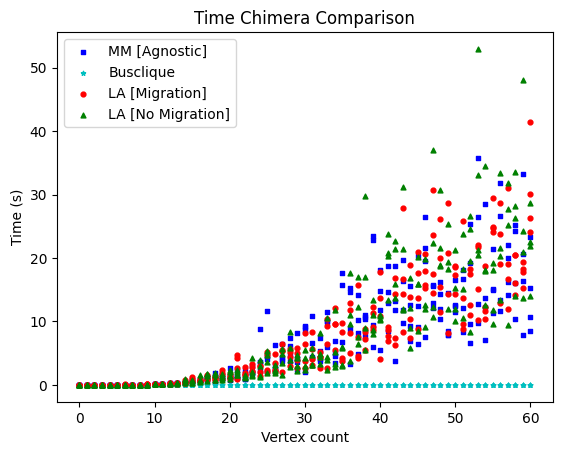

In [58]:
# Total Time, Algorithm per Topology
# Chimera
plt.clf()
plt.scatter(ns_arr, all_chim_comp_agn_time,s=10, c='b', marker="s", label='Agnostic')
plt.scatter(ns_arr, all_chim_comp_bc_time,s=10, c='c', marker="*", label='Busclique')
plt.scatter(ns_arr, all_chim_comp_lamg_time,s=12, c='r', marker="o", label='LA Mig')
plt.scatter(ns_arr, all_chim_comp_lanomg_time,s=12, c='g', marker="^", label='LA NoMig')
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Time Chimera Comparison")
plt.show()
#plt.savefig("images/total_comp_chimAllBC_time.png")

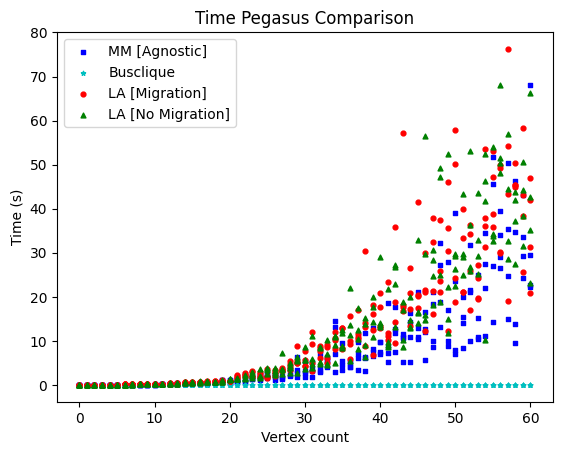

In [59]:
# Total Time, Algorithm per Topology
# Pegasus
plt.clf()
plt.scatter(ns_arr, all_peg_comp_agn_time,s=10, c='b', marker="s", label='Agnostic')
plt.scatter(ns_arr, all_peg_comp_bc_time,s=10, c='c', marker="*", label='Busclique')
plt.scatter(ns_arr, all_peg_comp_lamg_time,s=12, c='r', marker="o", label='LA Mig')
plt.scatter(ns_arr, all_peg_comp_lanomg_time,s=12, c='g', marker="^", label='LA NoMig')
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Time Pegasus Comparison")
plt.show()
#plt.savefig("images/total_comp_pegaAllBC_time.png")

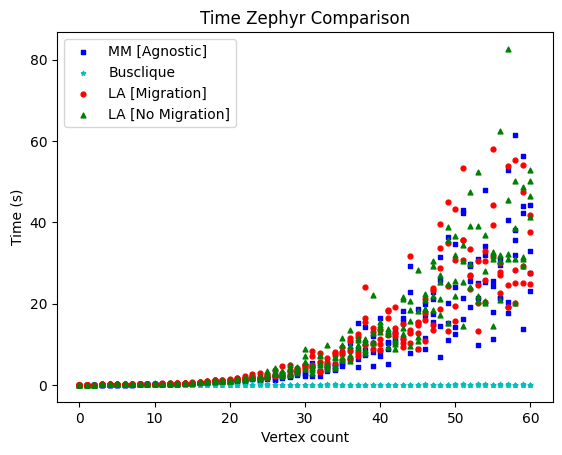

In [61]:
# Total Time, Algorithm per Topology
# Zephyr
plt.clf()
plt.scatter(ns_arr, all_zeph_comp_agn_time,s=10, c='b', marker="s", label='Agnostic')
plt.scatter(ns_arr, all_zeph_comp_bc_time,s=10, c='c', marker="*", label='Busclique')
plt.scatter(ns_arr, all_zeph_comp_lamg_time,s=12, c='r', marker="o", label='LA Mig')
plt.scatter(ns_arr, all_zeph_comp_lanomg_time,s=12, c='g', marker="^", label='LA NoMig')
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Time Zephyr Comparison")
plt.show()
#plt.savefig("images/total_comp_zephAllBC_time.png")

In [62]:
# qubit count

In [63]:
#mm_comp_out_run2.txt & all_mm_comp_out_zrun1.txt
all_chim_comp_bc_qubits = [0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 2, 2, 2, 2, 6, 6, 6, 6, 8, 8, 8, 8, 15, 15, 15, 15, 18, 18, 18, 18, 21, 21, 21, 21, 24, 24, 24, 24, 36, 36, 36, 36, 40, 40, 40, 40, 44, 44, 44, 44, 48, 48, 48, 48, 65, 65, 65, 65, 70, 70, 70, 70, 75, 75, 75, 75, 80, 80, 80, 80, 102, 102, 102, 102, 108, 108, 108, 108, 114, 114, 114, 114, 120, 120, 120, 120, 147, 147, 147, 147, 154, 154, 154, 154, 161, 161, 161, 161, 168, 168, 168, 168, 200, 200, 200, 200, 208, 208, 208, 208, 216, 216, 216, 216, 224, 224, 224, 224, 261, 261, 261, 261, 270, 270, 270, 270, 279, 279, 279, 279, 288, 288, 288, 288, 330, 330, 330, 330, 340, 340, 340, 340, 350, 350, 350, 350, 360, 360, 360, 360, 407, 407, 407, 407, 418, 418, 418, 418, 429, 429, 429, 429, 440, 440, 440, 440, 492, 492, 492, 492, 504, 504, 504, 504, 516, 516, 516, 516, 528, 528, 528, 528, 585, 585, 585, 585, 598, 598, 598, 598, 611, 611, 611, 611, 624, 624, 624, 624, 686, 686, 686, 686, 700, 700, 700, 700, 714, 714, 714, 714, 728, 728, 728, 728, 795, 795, 795, 795, 810, 810, 810, 810, 825, 825, 825, 825, 840, 840, 840, 840, 912, 912, 912, 912, 928, 928, 928, 928, 944, 944, 944, 944, 960, 960, 960, 960]
all_peg_comp_bc_qubits = [0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 10, 10, 10, 10, 12, 12, 12, 12, 14, 14, 14, 14, 16, 16, 16, 16, 18, 18, 18, 18, 20, 20, 20, 20, 33, 33, 33, 33, 36, 36, 36, 36, 39, 39, 39, 39, 42, 42, 42, 42, 45, 45, 45, 45, 48, 48, 48, 48, 51, 51, 51, 51, 54, 54, 54, 54, 57, 57, 57, 57, 60, 60, 60, 60, 80, 80, 80, 80, 84, 84, 84, 84, 87, 87, 87, 87, 90, 90, 90, 90, 94, 94, 94, 94, 98, 98, 98, 98, 102, 102, 102, 102, 106, 106, 106, 106, 110, 110, 110, 110, 114, 114, 114, 114, 150, 150, 150, 150, 154, 154, 154, 154, 159, 159, 159, 159, 164, 164, 164, 164, 168, 168, 168, 168, 172, 172, 172, 172, 177, 177, 177, 177, 182, 182, 182, 182, 187, 187, 187, 187, 192, 192, 192, 192, 197, 197, 197, 197, 202, 202, 202, 202, 251, 251, 251, 251, 256, 256, 256, 256, 262, 262, 262, 262, 268, 268, 268, 268, 273, 273, 273, 273, 278, 278, 278, 278, 284, 284, 284, 284, 290, 290, 290, 290, 296, 296, 296, 296, 302, 302, 302, 302, 308, 308, 308, 308, 314, 314, 314, 314, 376, 376, 376, 376, 382, 382, 382, 382, 389, 389, 389, 389, 396, 396, 396, 396, 402, 402, 402, 402, 408, 408, 408, 408]
all_zeph_comp_bc_qubits = [0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 10, 10, 10, 10, 12, 12, 12, 12, 14, 14, 14, 14, 16, 16, 16, 16, 27, 27, 27, 27, 30, 30, 30, 30, 33, 33, 33, 33, 36, 36, 36, 36, 39, 39, 39, 39, 42, 42, 42, 42, 45, 45, 45, 45, 48, 48, 48, 48, 51, 51, 51, 51, 54, 54, 54, 54, 57, 57, 57, 57, 60, 60, 60, 60, 63, 63, 63, 63, 66, 66, 66, 66, 69, 69, 69, 69, 72, 72, 72, 72, 100, 100, 100, 100, 104, 104, 104, 104, 108, 108, 108, 108, 112, 112, 112, 112, 116, 116, 116, 116, 120, 120, 120, 120, 124, 124, 124, 124, 128, 128, 128, 128, 132, 132, 132, 132, 136, 136, 136, 136, 140, 140, 140, 140, 144, 144, 144, 144, 148, 148, 148, 148, 152, 152, 152, 152, 156, 156, 156, 156, 160, 160, 160, 160, 205, 205, 205, 205, 210, 210, 210, 210, 215, 215, 215, 215, 220, 220, 220, 220, 225, 225, 225, 225, 230, 230, 230, 230, 235, 235, 235, 235, 240, 240, 240, 240, 245, 245, 245, 245, 250, 250, 250, 250, 255, 255, 255, 255, 260, 260, 260, 260, 265, 265, 265, 265, 270, 270, 270, 270, 275, 275, 275, 275, 280, 280, 280, 280, 342, 342, 342, 342, 348, 348, 348, 348, 354, 354, 354, 354, 360, 360, 360, 360]

In [64]:
#60total_data04_dw2000.txt
all_chim_comp_agn_qubits = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 14, 14, 14, 14, 18, 18, 18, 18, 22, 22, 22, 22, 27, 27, 26, 26, 36, 35, 35, 35, 40, 40, 40, 41, 46, 47, 46, 47, 59, 53, 54, 54, 70, 64, 68, 65, 73, 71, 74, 72, 80, 83, 85, 86, 97, 96, 92, 88, 113, 107, 108, 105, 120, 113, 123, 119, 139, 125, 132, 136, 144, 141, 151, 145, 157, 155, 170, 161, 174, 168, 165, 184, 183, 180, 185, 183, 214, 213, 200, 191, 232, 222, 221, 220, 241, 251, 222, 243, 249, 250, 264, 243, 284, 285, 283, 287, 309, 288, 289, 287, 315, 342, 309, 337, 316, 331, 350, 320, 355, 344, 336, 344, 421, 391, 410, 416, 389, 406, 407, 383, 408, 440, 419, 426, 439, 465, 488, 463, 504, 485, 481, 475, 540, 531, 514, 496, 526, 538, 568, 508, 537, 594, 550, 562, 639, 601, 586, 572, 614, 587, 643, 597, 634, 657, 676, 630, 642, 710, 683, 713, 727, 725, 696, 722, 767, 734, 778, 744, 785, 759, 714, 742, 873, 808, 875, 787, 859, 846, 894, 851, 868, 934, 837, 922, 933, 904, 883, 873, 935, 967, 903, 896, 1037, 960, 1051, 955, 1034, 1095, 1075, 1034, 1034, 1027, 1141, 1056, 1076, 1133, 1092, 1133, 1230, 1123, 1049, 1107, 1235, 1118, 1219, 1239, 1308, 1272, 1319, 1356]
all_chim_comp_lamg_qubits = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 14, 14, 14, 14, 18, 18, 18, 18, 22, 22, 22, 22, 27, 27, 26, 26, 34, 35, 34, 35, 42, 42, 41, 42, 47, 49, 47, 47, 53, 56, 57, 54, 67, 66, 68, 69, 75, 75, 72, 73, 78, 84, 82, 83, 88, 96, 89, 96, 108, 106, 112, 110, 121, 117, 113, 116, 130, 126, 123, 127, 134, 147, 142, 141, 153, 163, 158, 159, 166, 178, 166, 164, 187, 194, 187, 199, 195, 205, 205, 198, 224, 237, 212, 229, 241, 245, 252, 246, 252, 260, 259, 246, 268, 280, 292, 267, 317, 287, 308, 307, 326, 313, 335, 316, 363, 333, 336, 360, 368, 391, 363, 369, 374, 382, 418, 412, 408, 427, 415, 416, 424, 409, 449, 434, 484, 476, 482, 469, 517, 532, 510, 499, 561, 522, 516, 543, 612, 530, 543, 512, 598, 592, 622, 605, 600, 653, 596, 619, 640, 608, 682, 624, 671, 664, 669, 647, 692, 731, 749, 703, 775, 751, 726, 766, 747, 770, 805, 713, 808, 803, 856, 807, 869, 832, 813, 881, 924, 878, 869, 890, 897, 958, 875, 974, 967, 1000, 974, 980, 1039, 1041, 987, 987, 1091, 1095, 1024, 1097, 1060, 1061, 1049, 1026, 1044, 1074, 1181, 1091, 1189, 1188, 1194, 1107, 1219, 1200, 1244, 1200, 1251, 1218, 1247, 1240, 1263, 1298, 1250, 1260]
all_chim_comp_lanomg_qubits = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 14, 14, 14, 14, 18, 18, 18, 18, 23, 22, 22, 22, 27, 26, 27, 26, 34, 35, 35, 34, 46, 41, 40, 41, 46, 46, 46, 49, 52, 53, 53, 54, 65, 66, 66, 64, 72, 75, 73, 75, 80, 86, 85, 82, 92, 90, 90, 95, 109, 107, 108, 106, 125, 120, 116, 120, 127, 128, 126, 129, 140, 155, 142, 144, 173, 156, 157, 147, 167, 174, 161, 174, 188, 180, 192, 182, 208, 202, 200, 209, 229, 222, 216, 219, 252, 244, 237, 237, 247, 250, 273, 246, 273, 309, 296, 284, 308, 285, 304, 293, 322, 319, 320, 316, 341, 314, 346, 356, 360, 367, 393, 385, 407, 400, 396, 404, 414, 426, 408, 397, 419, 432, 439, 420, 463, 482, 464, 490, 457, 522, 465, 469, 535, 523, 508, 534, 566, 546, 555, 528, 585, 588, 574, 529, 630, 606, 587, 600, 597, 621, 660, 633, 653, 652, 760, 676, 725, 701, 769, 698, 722, 792, 737, 737, 801, 727, 773, 749, 822, 758, 810, 776, 808, 850, 828, 917, 929, 920, 902, 888, 920, 883, 927, 956, 943, 1026, 939, 955, 953, 995, 914, 1006, 1041, 1044, 1050, 1008, 1126, 1087, 1110, 1053, 1098, 1105, 1045, 1191, 1300, 1118, 1082, 1158, 1243, 1195, 1147, 1169, 1320, 1250, 1226, 1139, 1312, 1248, 1378, 1241]

In [66]:
#60total_data04_p16.txt
all_peg_comp_agn_qubits = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 3, 3, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 13, 10, 10, 10, 12, 12, 12, 12, 14, 15, 14, 16, 18, 18, 18, 18, 20, 20, 19, 20, 24, 25, 24, 26, 27, 29, 28, 29, 32, 32, 33, 32, 35, 37, 37, 36, 40, 39, 39, 39, 45, 44, 43, 43, 46, 46, 46, 47, 49, 50, 49, 50, 57, 52, 56, 54, 62, 61, 66, 62, 64, 71, 67, 68, 78, 77, 80, 74, 84, 82, 78, 87, 88, 84, 86, 91, 97, 93, 92, 96, 101, 108, 97, 104, 108, 106, 106, 103, 121, 107, 115, 122, 120, 122, 118, 120, 125, 127, 125, 138, 139, 130, 150, 138, 144, 140, 141, 144, 157, 154, 160, 156, 160, 162, 159, 165, 172, 166, 161, 175, 183, 189, 184, 189, 200, 202, 193, 192, 206, 185, 206, 207, 214, 222, 216, 218, 227, 216, 225, 225, 228, 220, 232, 235, 248, 257, 246, 236, 251, 250, 270, 272, 269, 267, 260, 261, 305, 276, 264, 315, 304, 300, 312, 286, 328, 295, 321, 283, 303, 312, 299, 309, 327, 304, 301, 335, 360, 317, 346, 325, 371, 349, 359, 333, 366, 388, 356, 351, 360, 401, 375, 363, 401, 390, 393, 399, 376, 397, 425, 435, 427, 437, 449, 408, 398, 408, 408, 432, 474, 422, 457, 450, 508, 461, 488, 461]
all_peg_comp_lamg_qubits = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 3, 3, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 10, 10, 10, 10, 12, 12, 12, 12, 14, 15, 14, 14, 19, 17, 16, 18, 22, 20, 20, 20, 24, 23, 24, 26, 28, 28, 27, 27, 33, 33, 30, 31, 36, 36, 37, 35, 41, 40, 38, 40, 43, 43, 43, 43, 46, 47, 46, 48, 51, 51, 49, 50, 58, 55, 54, 53, 62, 62, 61, 62, 66, 64, 65, 66, 76, 79, 74, 77, 82, 85, 80, 83, 89, 92, 89, 88, 97, 99, 94, 94, 101, 97, 99, 107, 106, 104, 105, 104, 121, 113, 115, 118, 119, 129, 127, 125, 136, 130, 130, 139, 138, 136, 144, 143, 149, 154, 153, 147, 157, 167, 163, 158, 174, 182, 168, 169, 190, 173, 195, 171, 179, 191, 180, 197, 200, 190, 201, 197, 210, 235, 198, 226, 235, 221, 218, 223, 221, 227, 245, 228, 253, 233, 262, 268, 240, 254, 247, 250, 260, 290, 257, 257, 274, 262, 282, 287, 268, 300, 300, 311, 291, 309, 307, 299, 307, 340, 317, 320, 315, 311, 310, 343, 340, 357, 364, 322, 338, 341, 378, 372, 408, 380, 378, 366, 401, 370, 398, 383, 383, 400, 383, 391, 403, 424, 390, 412, 455, 451, 415, 425, 424, 456, 452, 442, 454, 449, 475, 454, 462, 460, 493, 487, 512, 509, 518, 491]
all_peg_comp_lanomg_qubits = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 3, 3, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 10, 10, 10, 10, 12, 12, 12, 12, 14, 14, 14, 14, 16, 18, 17, 18, 20, 19, 22, 21, 24, 22, 22, 26, 26, 25, 29, 28, 31, 29, 32, 33, 37, 36, 35, 35, 39, 39, 39, 39, 42, 43, 42, 43, 49, 47, 47, 46, 50, 50, 51, 50, 57, 54, 53, 55, 58, 63, 65, 58, 68, 68, 72, 69, 76, 78, 78, 74, 89, 86, 82, 85, 87, 85, 85, 91, 96, 91, 93, 92, 100, 102, 100, 103, 109, 117, 107, 115, 108, 111, 110, 114, 120, 122, 117, 129, 137, 124, 149, 141, 151, 136, 138, 156, 151, 148, 143, 146, 165, 161, 161, 162, 167, 162, 168, 174, 174, 194, 177, 181, 184, 184, 185, 176, 204, 205, 210, 213, 211, 213, 211, 199, 214, 217, 221, 216, 234, 230, 230, 243, 232, 252, 237, 236, 267, 257, 240, 246, 270, 266, 281, 259, 286, 272, 268, 283, 280, 297, 284, 291, 299, 298, 294, 304, 299, 315, 300, 302, 302, 352, 329, 321, 330, 336, 359, 346, 364, 373, 372, 351, 360, 369, 400, 363, 379, 402, 379, 392, 417, 386, 367, 390, 423, 457, 413, 433, 442, 418, 445, 412, 405, 446, 455, 445, 471, 485, 451, 456, 481, 499, 526, 487, 477, 490, 494, 499]

In [68]:
#60total_complete_data01_z15.txt
all_zeph_comp_agn_qubits = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 3, 3, 4, 5, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 10, 10, 10, 10, 13, 12, 12, 12, 14, 15, 14, 15, 17, 17, 17, 17, 20, 20, 20, 20, 22, 22, 22, 22, 24, 24, 24, 24, 27, 27, 26, 26, 29, 29, 30, 29, 32, 32, 32, 37, 36, 38, 35, 36, 40, 39, 40, 40, 43, 46, 43, 46, 54, 56, 50, 49, 52, 53, 52, 61, 56, 56, 55, 57, 59, 59, 59, 59, 65, 62, 63, 76, 69, 67, 67, 66, 78, 70, 76, 71, 83, 76, 75, 77, 86, 86, 85, 85, 92, 91, 90, 88, 95, 99, 96, 93, 104, 106, 99, 99, 110, 114, 112, 107, 114, 122, 113, 112, 129, 128, 120, 126, 133, 157, 128, 133, 143, 132, 137, 134, 138, 145, 152, 145, 162, 165, 164, 152, 168, 173, 153, 167, 160, 169, 173, 180, 184, 180, 228, 191, 191, 182, 186, 187, 195, 198, 211, 186, 220, 209, 198, 201, 248, 215, 199, 218, 228, 215, 223, 240, 223, 249, 224, 232, 257, 242, 237, 229, 265, 257, 256, 291, 301, 269, 262, 254, 259, 261, 278, 280, 277, 289, 281, 297, 321, 291, 285, 329, 319, 295, 298, 290, 343, 362, 324, 332, 354, 346, 312, 338, 351, 374, 364, 346, 374, 327, 349, 366, 359, 374, 365, 394, 378, 409, 343, 412]
all_zeph_comp_lamg_qubits = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 3, 3, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 10, 10, 10, 10, 13, 12, 12, 13, 14, 15, 15, 15, 17, 17, 17, 17, 20, 20, 20, 20, 22, 22, 22, 22, 24, 24, 24, 24, 26, 26, 26, 26, 29, 29, 29, 29, 32, 32, 33, 33, 35, 35, 36, 36, 39, 39, 41, 40, 46, 43, 46, 45, 50, 49, 49, 48, 52, 53, 53, 53, 56, 56, 56, 56, 61, 60, 59, 59, 65, 62, 62, 65, 66, 67, 66, 66, 70, 72, 72, 70, 77, 81, 80, 76, 86, 82, 84, 84, 92, 89, 89, 89, 98, 97, 95, 96, 98, 102, 103, 100, 110, 111, 115, 110, 118, 117, 122, 118, 125, 120, 123, 125, 132, 132, 134, 133, 137, 135, 133, 137, 142, 148, 158, 133, 158, 154, 141, 157, 154, 175, 162, 146, 167, 169, 186, 173, 177, 173, 176, 178, 190, 182, 185, 186, 201, 191, 199, 201, 218, 202, 205, 214, 232, 228, 227, 225, 242, 228, 208, 224, 232, 238, 251, 219, 233, 248, 239, 244, 253, 245, 259, 271, 277, 260, 279, 245, 264, 286, 274, 288, 289, 283, 281, 295, 309, 301, 307, 319, 315, 288, 301, 332, 324, 318, 315, 320, 359, 308, 350, 369, 346, 345, 361, 332, 412, 365, 364, 379, 388, 393, 396, 362, 401, 381, 440, 382]
all_zeph_comp_lanomg_qubits = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 3, 3, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 10, 10, 10, 10, 12, 12, 12, 12, 15, 15, 15, 14, 17, 16, 18, 17, 20, 20, 20, 20, 22, 22, 22, 22, 24, 24, 24, 24, 27, 26, 26, 26, 29, 29, 29, 29, 33, 33, 34, 33, 39, 36, 35, 37, 41, 39, 40, 39, 44, 46, 46, 46, 49, 50, 49, 49, 53, 53, 52, 53, 56, 56, 56, 57, 60, 59, 59, 59, 62, 63, 64, 64, 68, 74, 66, 73, 72, 72, 70, 73, 77, 84, 76, 83, 84, 88, 86, 83, 89, 88, 87, 90, 94, 94, 94, 92, 103, 102, 104, 103, 106, 112, 108, 111, 119, 128, 115, 122, 127, 124, 124, 136, 134, 126, 125, 134, 136, 135, 146, 131, 145, 140, 143, 153, 153, 157, 157, 161, 168, 156, 147, 165, 178, 176, 164, 170, 173, 188, 184, 179, 193, 206, 209, 198, 209, 198, 198, 188, 214, 207, 211, 208, 227, 217, 206, 219, 220, 223, 217, 229, 230, 237, 238, 242, 241, 235, 245, 248, 243, 255, 264, 267, 266, 279, 275, 263, 273, 275, 271, 311, 279, 303, 281, 289, 300, 299, 289, 297, 301, 301, 304, 289, 316, 333, 341, 323, 326, 341, 371, 319, 347, 324, 364, 338, 362, 344, 378, 353, 367, 406, 360, 360, 367, 399, 383, 373]

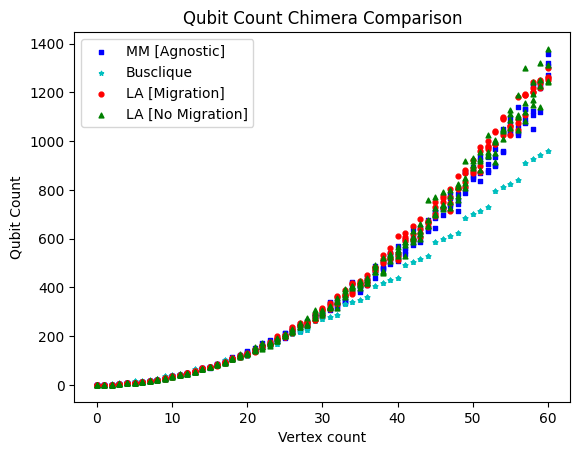

In [65]:
# Total Qubits, Algorithm per Topology
# Chimera
plt.clf()
plt.scatter(ns_arr, all_chim_comp_agn_qubits,s=10, c='b', marker="s", label='Agnostic')
plt.scatter(ns_arr, all_chim_comp_bc_qubits,s=10, c='c', marker="*", label='Busclique')
plt.scatter(ns_arr, all_chim_comp_lamg_qubits,s=12, c='r', marker="o", label='LA Mig')
plt.scatter(ns_arr, all_chim_comp_lanomg_qubits,s=12, c='g', marker="^", label='LA NoMig')
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit Count")
plt.title("Qubit Count Chimera Comparison")
plt.show()
#plt.savefig("images/total_comp_chimAllBC_qubitCount.png")

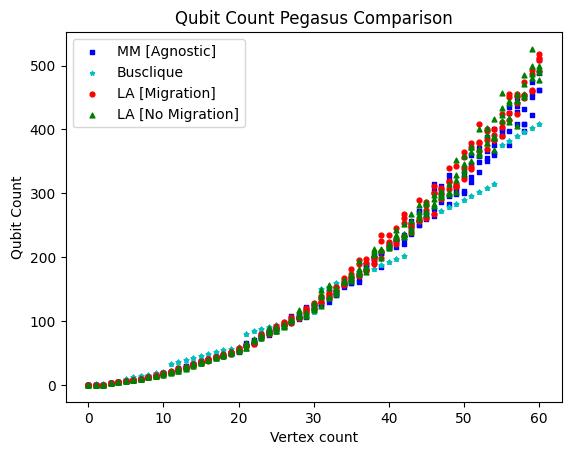

In [67]:
# Total Qubits, Algorithm per Topology
# Pegasus
plt.clf()
plt.scatter(ns_arr, all_peg_comp_agn_qubits,s=10, c='b', marker="s", label='Agnostic')
plt.scatter(ns_arr, all_peg_comp_bc_qubits,s=10, c='c', marker="*", label='Busclique')
plt.scatter(ns_arr, all_peg_comp_lamg_qubits,s=12, c='r', marker="o", label='LA Mig')
plt.scatter(ns_arr, all_peg_comp_lanomg_qubits,s=12, c='g', marker="^", label='LA NoMig')
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit Count")
plt.title("Qubit Count Pegasus Comparison")
plt.show()
#plt.savefig("images/total_comp_pegaAllBC_qubitCount.png")

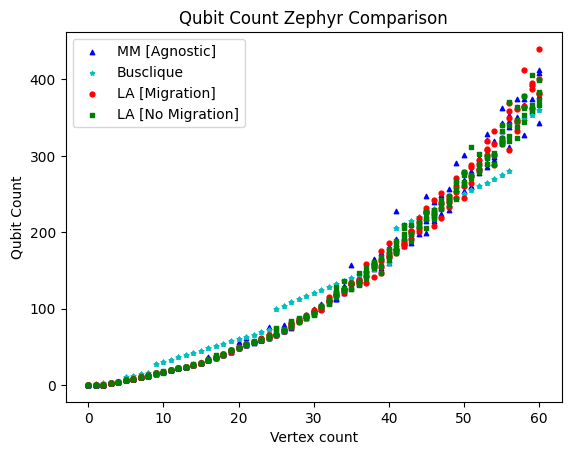

In [69]:
# Total Qubits, Algorithm per Topology
# Zephyr
plt.clf()
plt.scatter(ns_arr, all_zeph_comp_agn_qubits,s=10, c='b', marker="^", label='Agnostic')
plt.scatter(ns_arr, all_zeph_comp_bc_qubits,s=10, c='c', marker="*", label='Busclique')
plt.scatter(ns_arr, all_zeph_comp_lamg_qubits,s=12, c='r', marker="o", label='LA Mig')
plt.scatter(ns_arr, all_zeph_comp_lanomg_qubits,s=12, c='g', marker="s", label='LA NoMig')
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit Count")
plt.title("Qubit Count Zephyr Comparison")
plt.show()
#plt.savefig("images/total_comp_zephAllBC_qubitCount.png")

In [70]:
# maxchain

In [71]:
#mm_comp_out_run2.txt & all_mm_comp_out_zrun1.txt
all_chim_comp_bc_maxchain=[0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
all_peg_comp_bc_maxchain=[0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
all_zeph_comp_bc_maxchain=[0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [72]:
#60total_data04_dw2000.txt
all_chim_comp_agn_maxchain= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 7, 7, 7, 7, 8, 7, 8, 8, 9, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 10, 10, 9, 10, 9, 11, 11, 10, 9, 11, 11, 10, 11, 11, 12, 10, 11, 11, 10, 12, 11, 12, 14, 12, 13, 14, 12, 11, 12, 13, 16, 12, 14, 12, 13, 14, 12, 13, 12, 12, 14, 18, 16, 16, 18, 13, 15, 16, 13, 15, 15, 14, 16, 15, 15, 18, 17, 18, 18, 16, 17, 19, 19, 16, 15, 18, 19, 19, 15, 16, 23, 16, 19, 20, 19, 18, 16, 19, 17, 20, 18, 18, 21, 20, 18, 18, 20, 20, 22, 22, 22, 21, 21, 24, 21, 23, 20, 22, 21, 18, 19, 26, 25, 28, 21, 24, 24, 26, 24, 22, 26, 22, 25, 27, 23, 22, 22, 26, 24, 22, 21, 27, 23, 30, 26, 26, 28, 28, 26, 25, 25, 30, 25, 24, 26, 26, 29, 34, 27, 23, 26, 31, 25, 29, 32, 32, 32, 32, 34]
all_chim_comp_lamg_maxchain= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 7, 6, 7, 7, 7, 8, 7, 8, 7, 7, 7, 8, 8, 7, 7, 7, 9, 8, 8, 8, 9, 9, 9, 8, 10, 8, 8, 9, 11, 9, 10, 10, 10, 10, 10, 11, 11, 9, 11, 11, 11, 12, 11, 11, 12, 12, 10, 11, 13, 13, 11, 14, 11, 13, 12, 14, 12, 14, 13, 14, 12, 13, 15, 14, 15, 15, 15, 14, 15, 17, 16, 17, 16, 16, 14, 15, 14, 18, 15, 17, 18, 17, 17, 18, 19, 17, 17, 19, 18, 19, 20, 21, 17, 18, 16, 20, 20, 22, 22, 20, 21, 19, 19, 19, 18, 22, 21, 21, 21, 21, 20, 20, 27, 23, 21, 24, 23, 22, 22, 21, 23, 24, 19, 22, 22, 25, 24, 22, 24, 23, 26, 25, 25, 24, 26, 25, 28, 23, 26, 25, 26, 27, 27, 28, 27, 25, 28, 28, 27, 26, 28, 27, 26, 27, 25, 27, 26, 32, 31, 29, 30, 30, 28, 29, 29, 32, 31, 31, 30, 28, 30, 30, 29, 28, 27]
all_chim_comp_lanomg_maxchain= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 8, 8, 8, 8, 9, 8, 8, 11, 8, 9, 8, 8, 9, 8, 10, 9, 9, 10, 9, 11, 11, 9, 11, 11, 11, 10, 11, 12, 12, 11, 11, 11, 11, 12, 11, 11, 15, 13, 13, 13, 11, 13, 12, 13, 13, 13, 12, 14, 11, 14, 15, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 15, 15, 18, 17, 15, 16, 18, 15, 17, 15, 19, 15, 16, 19, 18, 18, 20, 20, 17, 20, 18, 20, 19, 18, 16, 19, 20, 18, 20, 17, 19, 21, 19, 20, 20, 23, 20, 21, 22, 24, 21, 23, 23, 22, 23, 25, 20, 24, 21, 25, 21, 24, 21, 21, 23, 24, 26, 25, 27, 26, 24, 23, 24, 28, 28, 24, 29, 23, 25, 23, 25, 24, 28, 26, 28, 25, 25, 31, 27, 32, 32, 29, 28, 26, 31, 32, 26, 26, 28, 29, 28, 26, 28, 31, 29, 28, 24, 30, 29, 33, 31]

In [74]:
#60total_data04_p16.txt
all_peg_comp_agn_maxchain= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 5, 4, 4, 4, 5, 5, 4, 5, 4, 5, 6, 4, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 7, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 6, 7, 8, 7, 8, 7, 8, 7, 8, 8, 8, 7, 7, 7, 8, 8, 9, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 10, 8, 9, 10, 9, 9, 9, 8, 9, 8, 9, 7, 9, 8, 8, 9, 9, 8, 10, 9, 10, 8, 9, 9, 10, 9, 10, 10, 10, 10, 9, 9, 9, 10, 9, 9, 10, 10, 10, 10, 9, 9, 10, 11, 11, 11, 12, 10, 11, 9, 11, 10, 12, 10, 11, 10, 13, 11, 11, 11]
all_peg_comp_lamg_maxchain= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 7, 6, 7, 7, 7, 6, 7, 7, 7, 7, 6, 6, 7, 6, 7, 7, 7, 7, 7, 7, 8, 6, 8, 8, 7, 8, 8, 8, 8, 9, 7, 8, 8, 9, 9, 7, 8, 8, 8, 8, 10, 8, 8, 8, 7, 9, 9, 8, 10, 9, 10, 8, 10, 9, 8, 9, 10, 9, 9, 9, 8, 9, 10, 9, 10, 10, 9, 9, 9, 10, 11, 12, 10, 10, 9, 11, 11, 10, 11, 10, 10, 10, 10, 10, 11, 10, 10, 11, 11, 11, 11, 11, 11, 11, 10, 11, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 12]
all_peg_comp_lanomg_maxchain= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 7, 7, 6, 7, 6, 7, 6, 7, 6, 8, 7, 7, 7, 7, 7, 6, 7, 7, 8, 8, 7, 8, 8, 7, 7, 7, 8, 8, 7, 8, 9, 9, 8, 8, 8, 8, 9, 8, 8, 8, 9, 9, 9, 8, 9, 8, 8, 9, 8, 9, 9, 8, 9, 9, 8, 9, 8, 9, 8, 9, 8, 11, 10, 9, 9, 10, 10, 9, 10, 10, 10, 9, 9, 10, 11, 10, 10, 11, 10, 10, 12, 9, 9, 11, 10, 12, 10, 12, 11, 10, 11, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 12, 11, 12, 11, 12]

In [76]:
#60total_complete_data01_z15.txt
all_zeph_comp_agn_maxchain= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 8, 7, 6, 6, 7, 6, 6, 6, 7, 6, 7, 7, 6, 6, 8, 6, 6, 7, 7, 6, 7, 7, 7, 8, 7, 7, 8, 7, 7, 6, 8, 8, 8, 8, 9, 7, 8, 7, 7, 7, 8, 8, 8, 7, 7, 8, 8, 8, 8, 9, 8, 7, 8, 7, 9, 9, 8, 8, 9, 8, 8, 9, 8, 10, 9, 9, 10, 8, 9, 9, 8, 9, 9, 10, 9, 10, 8, 10]
all_zeph_comp_lamg_maxchain= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 6, 4, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 7, 8, 6, 7, 7, 8, 7, 7, 7, 8, 7, 6, 7, 7, 7, 8, 7, 7, 8, 7, 7, 7, 7, 7, 8, 8, 8, 8, 6, 8, 7, 8, 8, 8, 8, 8, 8, 9, 8, 9, 9, 8, 7, 8, 9, 8, 9, 8, 8, 9, 8, 9, 11, 9, 9, 10, 8, 11, 10, 9, 10, 9, 10, 10, 9, 10, 9, 10, 10]
all_zeph_comp_lanomg_maxchain= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 5, 4, 5, 6, 4, 5, 5, 5, 5, 6, 6, 5, 4, 5, 5, 5, 6, 5, 5, 5, 4, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 6, 6, 6, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 6, 7, 7, 6, 7, 7, 7, 7, 8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 7, 8, 7, 10, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 8, 8, 9, 10, 8, 9, 8, 10, 8, 9, 9, 10, 9, 9, 10, 9, 8, 9, 9, 9, 9]

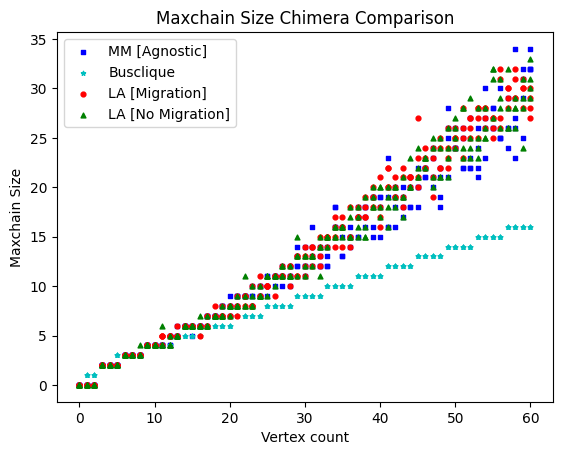

In [73]:
# Total Maxchain, Algorithm per Topology
# Chimera
plt.clf()
plt.scatter(ns_arr, all_chim_comp_agn_maxchain,s=10, c='b', marker="s", label='Agnostic')
plt.scatter(ns_arr, all_chim_comp_bc_maxchain,s=10, c='c', marker="*", label='Busclique')
plt.scatter(ns_arr, all_chim_comp_lamg_maxchain,s=12, c='r', marker="o", label='LA Mig')
plt.scatter(ns_arr, all_chim_comp_lanomg_maxchain,s=12, c='g', marker="^", label='LA NoMig')
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Maxchain Size Chimera Comparison")
plt.show()
#plt.savefig("images/total_comp_chimAllBC_maxchain.png")

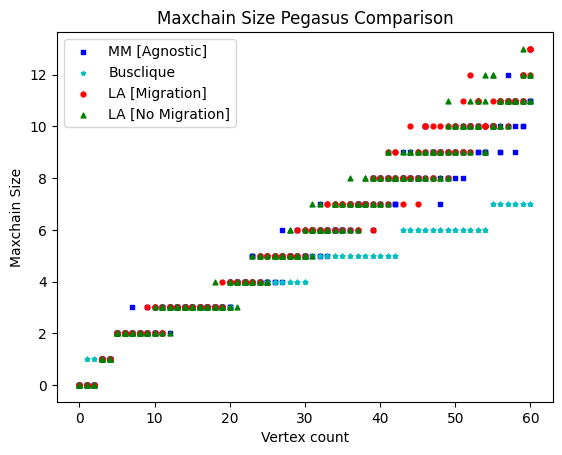

In [75]:
# Total Maxchain, Algorithm per Topology
# Pegasus
plt.clf()
plt.scatter(ns_arr, all_peg_comp_agn_maxchain,s=10, c='b', marker="s", label='Agnostic')
plt.scatter(ns_arr, all_peg_comp_bc_maxchain,s=10, c='c', marker="*", label='Busclique')
plt.scatter(ns_arr, all_peg_comp_lamg_maxchain,s=12, c='r', marker="o", label='LA Mig')
plt.scatter(ns_arr, all_peg_comp_lanomg_maxchain,s=12, c='g', marker="^", label='LA NoMig')
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Maxchain Size Pegasus Comparison")
plt.show()
#plt.savefig("images/total_comp_pegaAllBC_maxchain.png")

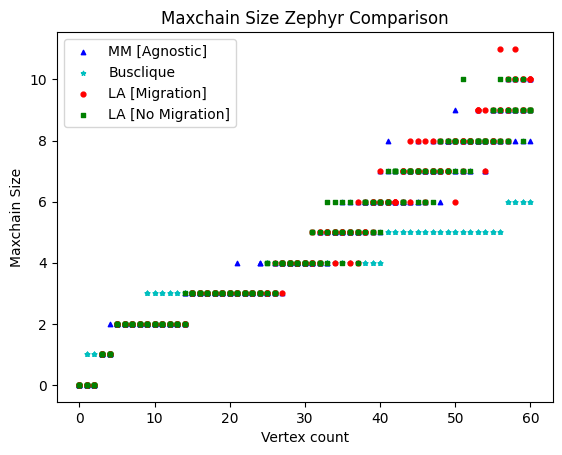

In [77]:
# Total Maxchain, Algorithm per Topology
# Zephyr
plt.clf()
plt.scatter(ns_arr, all_zeph_comp_agn_maxchain,s=10, c='b', marker="^", label='Agnostic')
plt.scatter(ns_arr, all_zeph_comp_bc_maxchain,s=10, c='c', marker="*", label='Busclique')
plt.scatter(ns_arr, all_zeph_comp_lamg_maxchain,s=12, c='r', marker="o", label='LA Mig')
plt.scatter(ns_arr, all_zeph_comp_lanomg_maxchain,s=12, c='g', marker="s", label='LA NoMig')
plt.legend(["MM [Agnostic]", "Busclique", "LA [Migration]", "LA [No Migration]"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Maxchain Size Zephyr Comparison")
plt.show()
#plt.savefig("images/total_comp_zephAllBC_maxchain.png")

In [78]:
##################################

In [ ]:
## Totals, Compare Topologies per Algorithms ##

In [79]:
# set x-array

n=61
m=4

ns_arr = [0.0]*n*m

for j in range(n):
    for i in range(4):
        ns_arr[j*m+i] = j


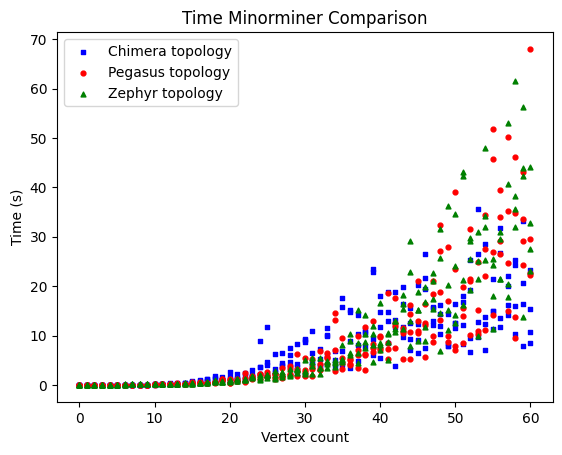

In [34]:
# MM
plt.clf()
plt.scatter(ns_arr, all_chim_comp_agn_time,s=10, c='b', marker="s", label='Chimera')
plt.scatter(ns_arr, all_peg_comp_agn_time,s=12, c='r', marker="o", label='Pegasus')
plt.scatter(ns_arr, all_zeph_comp_agn_time,s=12, c='g', marker="^", label='Zephyr')
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Time Minorminer Comparison")
plt.show()
#plt.savefig("images/total_comp_agnmm_time.png")

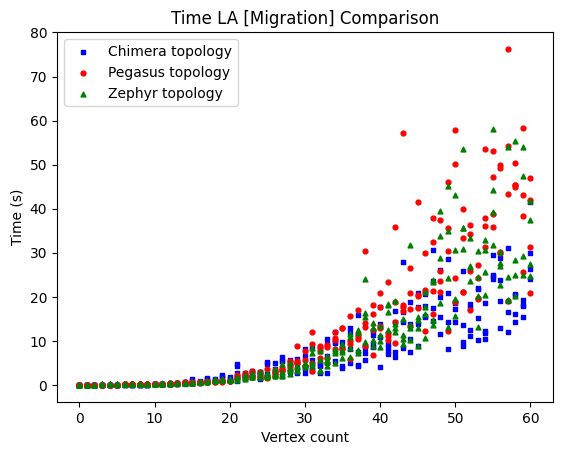

In [35]:
# LA Mig=True
plt.clf()
plt.scatter(ns_arr, all_chim_comp_lamg_time,s=10, c='b', marker="s", label='Chimera')
plt.scatter(ns_arr, all_peg_comp_lamg_time,s=12, c='r', marker="o", label='Pegasus')
plt.scatter(ns_arr, all_zeph_comp_lamg_time,s=12, c='g', marker="^", label='Zephyr')
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Time LA [Migration] Comparison")
plt.show()
#plt.savefig("images/total_comp_lamg_time.png")

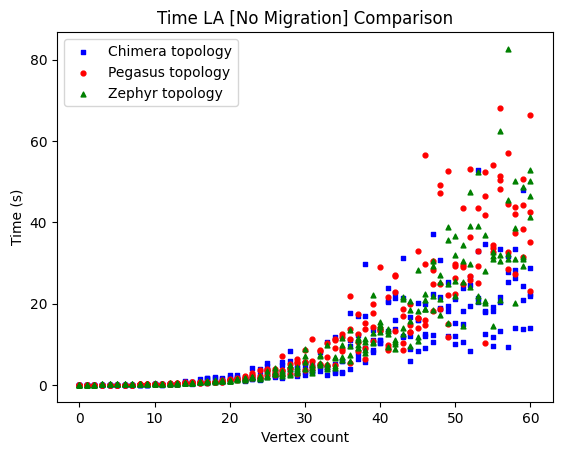

In [36]:
# LA Mig=False
plt.clf()
plt.scatter(ns_arr, all_chim_comp_lanomg_time,s=10, c='b', marker="s", label='Chimera')
plt.scatter(ns_arr, all_peg_comp_lanomg_time,s=12, c='r', marker="o", label='Pegasus')
plt.scatter(ns_arr, all_zeph_comp_lanomg_time,s=12, c='g', marker="^", label='Zephyr')
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Time LA [No Migration] Comparison")
plt.show()
#plt.savefig("images/total_comp_lanomg_time.png")

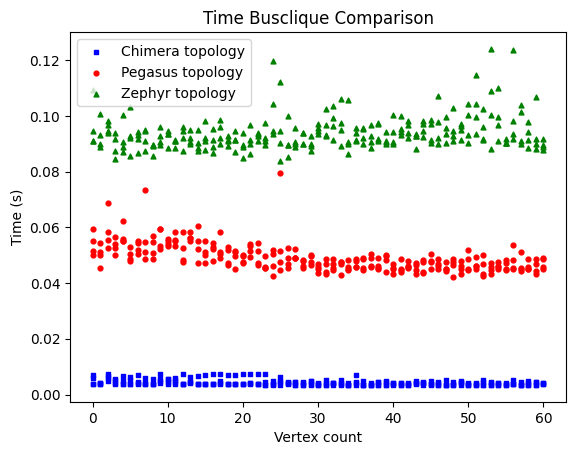

In [80]:
# BC
plt.clf()
plt.scatter(ns_arr, all_chim_comp_bc_time,s=10, c='b', marker="s", label='Chimera')
plt.scatter(ns_arr, all_peg_comp_bc_time,s=12, c='r', marker="o", label='Pegasus')
plt.scatter(ns_arr, all_zeph_comp_bc_time,s=12, c='g', marker="^", label='Zephyr')
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Time Busclique Comparison")
plt.show()
#plt.savefig("images/total_comp_bc_time.png")

In [81]:
####

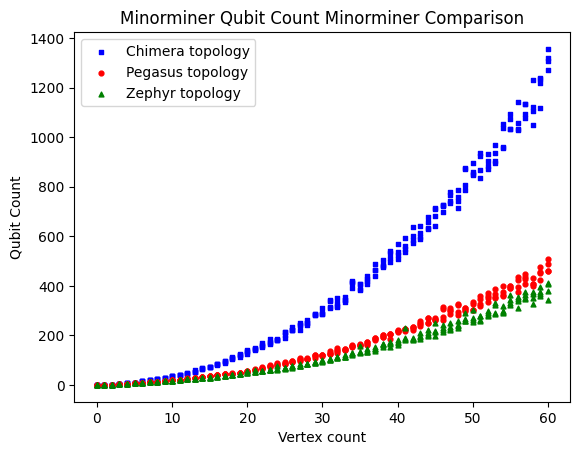

In [41]:
plt.clf()
plt.scatter(ns_arr, all_chim_comp_agn_qubits,s=10, c='b', marker="s", label='Chimera')
plt.scatter(ns_arr, all_peg_comp_agn_qubits,s=12, c='r', marker="o", label='Pegasus')
plt.scatter(ns_arr, all_zeph_comp_agn_qubits,s=12, c='g', marker="^", label='Zephyr')
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit Count")
plt.title("Minorminer Qubit Count Minorminer Comparison")
plt.show()
#plt.savefig("images/total_comp_agnmm_qubitcnt.png")

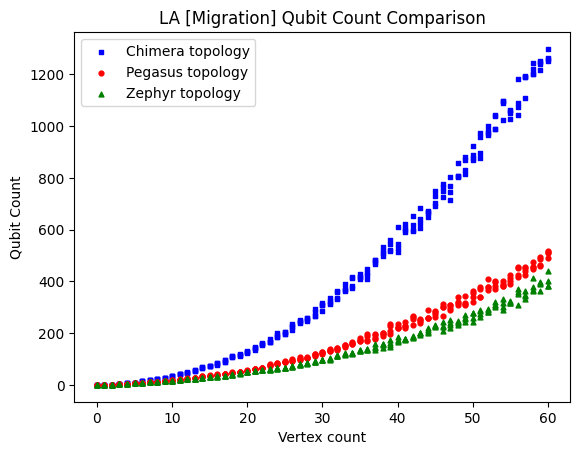

In [42]:
plt.clf()
plt.scatter(ns_arr, all_chim_comp_lamg_qubits,s=10, c='b', marker="s", label='Chimera')
plt.scatter(ns_arr, all_peg_comp_lamg_qubits,s=12, c='r', marker="o", label='Pegasus')
plt.scatter(ns_arr, all_zeph_comp_lamg_qubits,s=12, c='g', marker="^", label='Zephyr')
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit Count")
plt.title("LA [Migration] Qubit Count Comparison")
plt.show()
#plt.savefig("images/total_comp_lamg_qubitcnt.png")

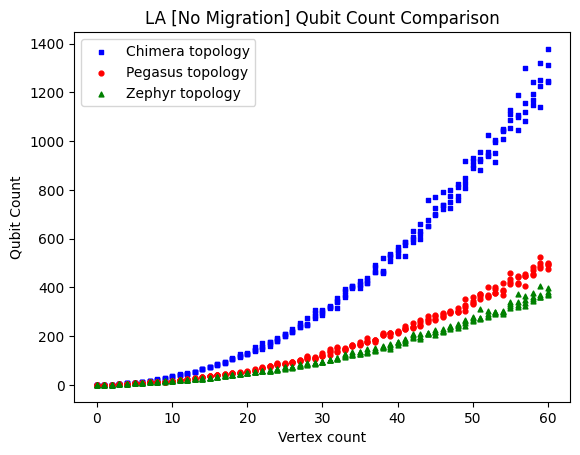

In [43]:
plt.clf()
plt.scatter(ns_arr, all_chim_comp_lanomg_qubits,s=10, c='b', marker="s", label='Chimera')
plt.scatter(ns_arr, all_peg_comp_lanomg_qubits,s=12, c='r', marker="o", label='Pegasus')
plt.scatter(ns_arr, all_zeph_comp_lanomg_qubits,s=12, c='g', marker="^", label='Zephyr')
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Qubit Count")
plt.title("LA [No Migration] Qubit Count Comparison")
plt.show()
#plt.savefig("images/total_comp_lanomg_qubitcnt.png")

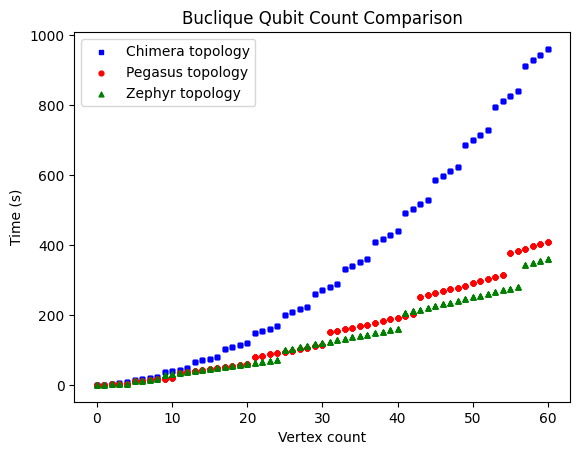

In [82]:
plt.clf()
plt.scatter(ns_arr, all_chim_comp_bc_qubits,s=10, c='b', marker="s", label='Chimera')
plt.scatter(ns_arr, all_peg_comp_bc_qubits,s=12, c='r', marker="o", label='Pegasus')
plt.scatter(ns_arr, all_zeph_comp_bc_qubits,s=12, c='g', marker="^", label='Zephyr')
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Time (s)")
plt.title("Buclique Qubit Count Comparison")
plt.show()
#plt.savefig("images/total_comp_bc_qubits.png")

In [44]:
####

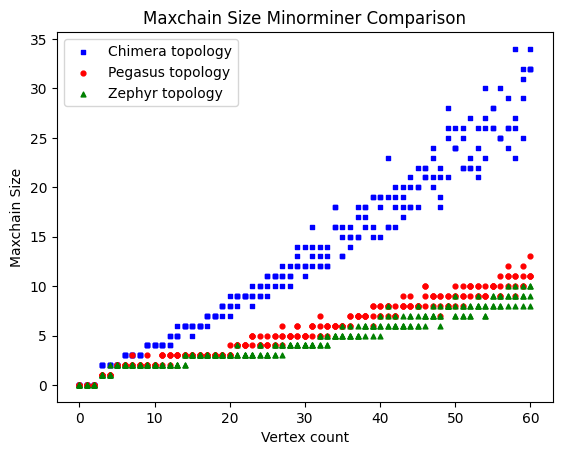

In [49]:
plt.clf()
plt.scatter(ns_arr, all_chim_comp_agn_maxchain,s=10, c='b', marker="s", label='Chimera')
plt.scatter(ns_arr, all_peg_comp_agn_maxchain,s=12, c='r', marker="o", label='Pegasus')
plt.scatter(ns_arr, all_zeph_comp_agn_maxchain,s=12, c='g', marker="^", label='Zephyr')
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Maxchain Size Minorminer Comparison")
plt.show()
#plt.savefig("images/total_comp_agnmm_maxchain.png")

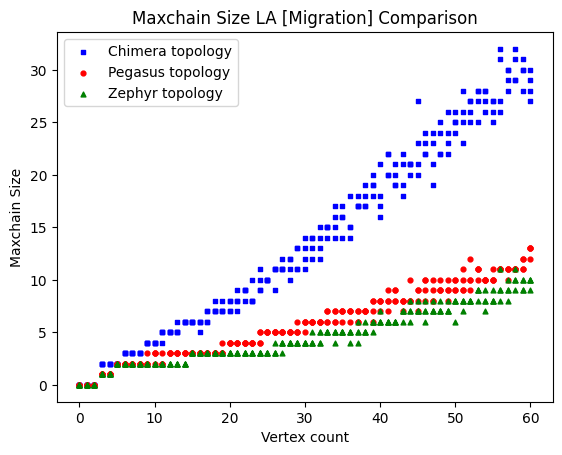

In [50]:
plt.clf()
plt.scatter(ns_arr, all_chim_comp_lamg_maxchain,s=10, c='b', marker="s", label='Chimera')
plt.scatter(ns_arr, all_peg_comp_lamg_maxchain,s=12, c='r', marker="o", label='Pegasus')
plt.scatter(ns_arr, all_zeph_comp_lamg_maxchain,s=12, c='g', marker="^", label='Zephyr')
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Maxchain Size LA [Migration] Comparison")
plt.show()
#plt.savefig("images/total_comp_lamg_maxchain.png")

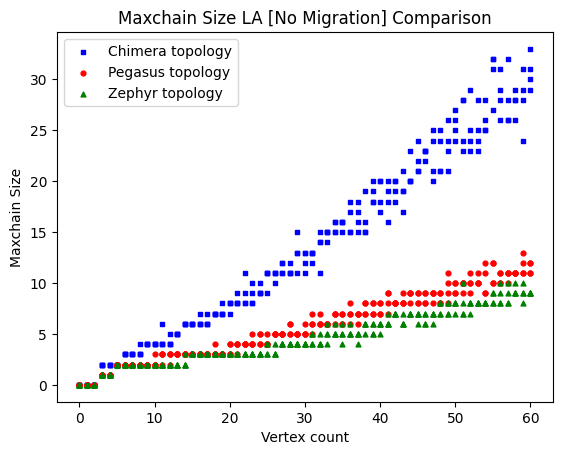

In [51]:
plt.clf()
plt.scatter(ns_arr, all_chim_comp_lanomg_maxchain,s=10, c='b', marker="s", label='Chimera')
plt.scatter(ns_arr, all_peg_comp_lanomg_maxchain,s=12, c='r', marker="o", label='Pegasus')
plt.scatter(ns_arr, all_zeph_comp_lanomg_maxchain,s=12, c='g', marker="^", label='Zephyr')
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Maxchain Size LA [No Migration] Comparison")
plt.show()
#plt.savefig("images/total_comp_lanomg_maxchain.png")

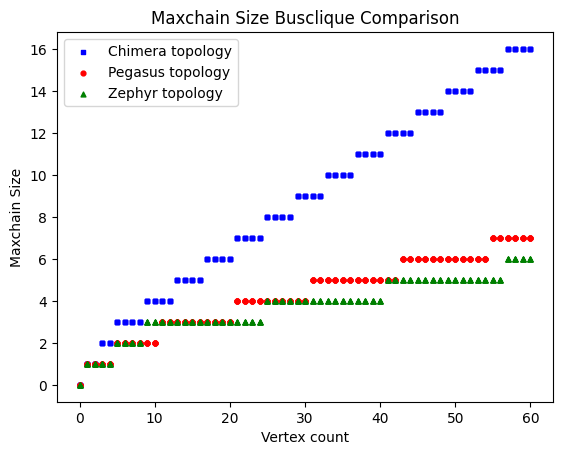

In [83]:
plt.clf()
plt.scatter(ns_arr, all_chim_comp_bc_maxchain,s=10, c='b', marker="s", label='Chimera')
plt.scatter(ns_arr, all_peg_comp_bc_maxchain,s=12, c='r', marker="o", label='Pegasus')
plt.scatter(ns_arr, all_zeph_comp_bc_maxchain,s=12, c='g', marker="^", label='Zephyr')
plt.legend(["Chimera topology", "Pegasus topology", "Zephyr topology"])
plt.xlabel("Vertex count")
plt.ylabel("Maxchain Size")
plt.title("Maxchain Size Busclique Comparison")
plt.show()
#plt.savefig("images/total_comp_bc_maxchain.png")